# (Ford GoBike System Data)
## by (Mohamed Sebaie Sebaie)

## Preliminary Wrangling

> - This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco 
Bay area.
> - Ford, in collaboration with Motivate, is launching Ford GoBike – a regional bike-share network designed to enhance sustainable transportation in the San Francisco Bay Area.
> - Beginning tomorrow, Ford GoBike is expanding the area’s existing bike-share program to 546 stations and 7,000 bikes – serving San Francisco, San Jose and East Bay; riders can access GoBike through the FordPass™ app.
> - Designed for the hilly urban environment of San Francisco, Ford GoBikes are built to be comfortable and easy to ride.

<img src="gobikes.jpg">

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(rc={'figure.figsize': [14, 14]}, font_scale=1.2)
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Import the data from csv into dataframe..
df=pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Increase the display columns..
pd.set_option('display.max_columns', None)

In [4]:
# Visualize the first 5 rows in the dataframe..
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# See the shape of the data..
df.shape

(183412, 16)

In [6]:
# Visualize 30 rows sample of the data to get more insight about the data..
df.sample(15)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
138894,390,2019-02-08 01:15:08.4610,2019-02-08 01:21:39.3240,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,63.0,Bryant St at 6th St,37.775910,-122.402575,1392,Subscriber,1977.0,Male,Yes
39093,279,2019-02-23 10:24:22.1240,2019-02-23 10:29:01.5780,96.0,Dolores St at 15th St,37.766210,-122.426614,119.0,18th St at Noe St,37.761047,-122.432642,5240,Subscriber,1983.0,Male,No
174602,218,2019-02-02 17:29:59.4650,2019-02-02 17:33:38.3760,134.0,Valencia St at 24th St,37.752428,-122.420628,132.0,24th St at Chattanooga St,37.751819,-122.426614,5405,Subscriber,1990.0,Female,No
151396,329,2019-02-06 17:20:41.3000,2019-02-06 17:26:10.6830,341.0,Fountain Alley at S 2nd St,37.336188,-121.889277,312.0,San Jose Diridon Station,37.329732,-121.901782,4027,Subscriber,1991.0,Male,No
41894,1600,2019-02-22 17:44:46.1490,2019-02-22 18:11:26.7520,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,95.0,Sanchez St at 15th St,37.766219,-122.431060,2627,Customer,1980.0,Male,No
97642,568,2019-02-15 08:43:18.4220,2019-02-15 08:52:47.3870,89.0,Division St at Potrero Ave,37.769218,-122.407646,114.0,Rhode Island St at 17th St,37.764478,-122.402570,2230,Subscriber,1954.0,Male,No
105201,837,2019-02-14 07:23:49.5480,2019-02-14 07:37:46.7330,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,14.0,Clay St at Battery St,37.795001,-122.399970,1018,Subscriber,1968.0,Male,No
39092,410,2019-02-23 10:22:36.8350,2019-02-23 10:29:27.1230,119.0,18th St at Noe St,37.761047,-122.432642,121.0,Mission Playground,37.759210,-122.421339,5438,Customer,1975.0,Male,No
135607,503,2019-02-08 12:17:47.7410,2019-02-08 12:26:11.4310,251.0,California St at University Ave,37.870555,-122.279720,246.0,Berkeley Civic Center,37.869060,-122.270556,4662,Subscriber,NaN,NaN,No
82732,473,2019-02-18 09:14:38.7750,2019-02-18 09:22:32.0770,16.0,Steuart St at Market St,37.794130,-122.394430,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6497,Subscriber,1985.0,Male,No


In [7]:
# Show the info to check the nulls and the data types of each column..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

**- As we see there are `null values` and `Columns Dtypes` not appropriate for all columns.**

In [8]:
# Check the number of null and its columns..
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

**- As we saw in info, there are some columns with null value.**

In [9]:
# Check the percentage of null to all data to see how to handel this null values..
(df.isnull().sum()/len(df))*100

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

**- The percentage of null values to lenght of datafram is very low, though the most appropraite solution is to remove the null value.**

In [10]:
# Check if there are any duplicated values..
df.duplicated().sum()

0

**- There are no duplicates in the df.**

In [11]:
# Visualize the columns names..
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [12]:
# See the value counts of all columns to see if coulmns have a non_valid values..
for col in df.columns:
    print(col+ '\n------------')
    print(df[col].value_counts())
    print('------------'*2)

duration_sec
------------
272      311
324      292
323      291
306      291
305      290
        ... 
5803       1
11870      1
5931       1
15964      1
5058       1
Name: duration_sec, Length: 4752, dtype: int64
------------------------
start_time
------------
2019-02-01 13:40:09.4920    2
2019-02-22 20:11:42.2560    2
2019-02-15 08:43:18.4220    2
2019-02-15 07:47:00.1970    2
2019-02-25 08:52:07.5820    2
                           ..
2019-02-07 20:32:36.0260    1
2019-02-28 23:00:05.2230    1
2019-02-07 08:40:22.3970    1
2019-02-05 20:02:00.7900    1
2019-02-01 17:35:27.1440    1
Name: start_time, Length: 183401, dtype: int64
------------------------
end_time
------------
2019-02-05 17:48:45.8240    2
2019-02-23 12:07:02.5700    2
2019-02-14 08:20:06.2300    2
2019-02-11 08:03:22.6020    2
2019-02-22 07:55:50.7860    2
                           ..
2019-02-23 16:53:37.2060    1
2019-02-18 22:08:02.1240    1
2019-02-16 13:31:23.6380    1
2019-02-10 17:28:39.5310    1
2019-02-07 

In [13]:
# descibe the data to see the ranges of the data like min , max , and check if there are any non-valid values..
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


**- From value_counts() and df.describe() we figure out that: member_birth_year has outliers like (1930, 1910, 1927, 1928, 1878) Though we should correct that be removing the outliers.**

# Data Cleaning

### `From The Above, We Found These Below Problems That Will Be Cleaned In The Next Part:`


**1. `start_station_id`, `start_station_name`, `member_birth_year`, `member_gender` have missing value though because the percentage is very lower in comparsions with the lenght of df so we should remove this null values.**

**2. Data Type of `start_time`, `end_time`, `start_station_id`,`end_station_id`,`member_birth_year` will be changed to their appropriate Dtype.**


**3. From `value_counts()` and `df.describe()` we figure out that: `member_birth_year` has outliers like (1930, 1910, 1927, 1928, 1878) Though we should correct that be removing the outliers.** 


**4- Extract columns from `Date-Time` columns for better visualization and to fet more insights to the data.**

**5- Create `distance_km` column from `Longituide` and `Latitiude` Columns for better visualization.**


## 1- Remove the Null values

In [14]:
# Check the shape of the data frame before cleaning..
df.shape

(183412, 16)

In [15]:
# Visualize sample of the data..
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
65109,266,2019-02-20 10:10:32.3470,2019-02-20 10:14:58.8650,170.0,Telegraph Ave at 58th St,37.844493,-122.261351,171.0,Rockridge BART Station,37.844279,-122.251900,6409,Subscriber,1970.0,Male,No
129832,1851,2019-02-10 00:59:03.3460,2019-02-10 01:29:55.0170,266.0,Parker St at Fulton St,37.862464,-122.264791,245.0,Downtown Berkeley BART,37.870139,-122.268422,4690,Subscriber,1999.0,Male,Yes
39354,651,2019-02-23 09:23:52.0090,2019-02-23 09:34:43.8110,249.0,Russell St at College Ave,37.858473,-122.253253,171.0,Rockridge BART Station,37.844279,-122.251900,3632,Subscriber,1965.0,Male,No
149075,696,2019-02-06 19:58:14.0040,2019-02-06 20:09:50.0250,176.0,MacArthur BART Station,37.828410,-122.266315,152.0,47th St at San Pablo Ave,37.835632,-122.281051,3199,Subscriber,1962.0,Male,No
54312,755,2019-02-21 13:06:22.1860,2019-02-21 13:18:57.5720,25.0,Howard St at 2nd St,37.787522,-122.397405,89.0,Division St at Potrero Ave,37.769218,-122.407646,4809,Subscriber,1988.0,Male,No
68633,167,2019-02-19 21:43:58.0340,2019-02-19 21:46:45.6200,50.0,2nd St at Townsend St,37.780526,-122.390288,81.0,Berry St at 4th St,37.775880,-122.393170,1988,Subscriber,1991.0,Male,No
48246,886,2019-02-22 07:55:25.6780,2019-02-22 08:10:11.7970,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,130.0,22nd St Caltrain Station,37.757288,-122.392051,5306,Subscriber,1986.0,Female,No
157582,493,2019-02-05 21:22:50.1050,2019-02-05 21:31:03.9880,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,76.0,McCoppin St at Valencia St,37.771662,-122.422423,3663,Subscriber,1990.0,Male,No
77012,419,2019-02-19 07:47:19.3610,2019-02-19 07:54:18.9040,16.0,Steuart St at Market St,37.794130,-122.394430,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,5297,Subscriber,1974.0,Male,No
160234,151,2019-02-05 17:20:49.8950,2019-02-05 17:23:21.3760,245.0,Downtown Berkeley BART,37.870139,-122.268422,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3505,Subscriber,1991.0,Male,No


In [16]:
# Check the info again to compare before and after removing null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [17]:
# Check the null before removing..
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [18]:
# Remove the null values because as we saw before it is very low percent of the data though it bettter to remover than fill with mean,median or mode
df=df.dropna()

In [19]:
# Check the shape again after removing..
df.shape

(174952, 16)

In [20]:
# Check the null before removig..
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

## 2- Correct the Dtype of the columns

In [21]:
# Check the info again to see the dtypes of columns..
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [22]:
#Change the date columns from object to 'datetime' dtype..
df['start_time']= pd.to_datetime(df['start_time'])
df['end_time']= pd.to_datetime(df['end_time'])

In [23]:
#Change the Columns from Float to int64..
df = df.astype({"start_station_id":'int', "end_station_id":'int', "member_birth_year":'int'})  

In [24]:
# Check the info again to see the dtypes of columns..
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [25]:
# Visualize sample of the data..
df.sample(15)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
111478,967,2019-02-12 16:55:28.313,2019-02-12 17:11:35.915,58,Market St at 10th St,37.776619,-122.417385,81,Berry St at 4th St,37.775880,-122.393170,4986,Customer,1987,Male,No
65898,280,2019-02-20 09:12:16.751,2019-02-20 09:16:57.375,210,45th St at Manila,37.833294,-122.256224,209,45th St at MLK Jr Way,37.833558,-122.267418,3627,Subscriber,1988,Female,No
56016,552,2019-02-21 09:21:42.692,2019-02-21 09:30:54.835,81,Berry St at 4th St,37.775880,-122.393170,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,6551,Subscriber,1995,Male,No
48859,565,2019-02-22 06:44:31.993,2019-02-22 06:53:57.184,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,77,11th St at Natoma St,37.773507,-122.416040,2891,Subscriber,1991,Female,No
9474,615,2019-02-28 07:01:35.020,2019-02-28 07:11:50.602,22,Howard St at Beale St,37.789756,-122.394643,6,The Embarcadero at Sansome St,37.804770,-122.403234,2069,Subscriber,1954,Male,No
92239,328,2019-02-15 19:36:48.407,2019-02-15 19:42:17.173,223,16th St Mission BART Station 2,37.764765,-122.420091,106,Sanchez St at 17th St,37.763242,-122.430675,4770,Subscriber,1954,Female,No
16939,441,2019-02-27 07:52:42.544,2019-02-27 08:00:03.617,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,6098,Subscriber,1973,Male,No
17013,825,2019-02-27 07:41:19.977,2019-02-27 07:55:05.573,52,McAllister St at Baker St,37.777416,-122.441838,60,8th St at Ringold St,37.774520,-122.409449,4960,Subscriber,1982,Female,No
54824,368,2019-02-21 11:53:39.278,2019-02-21 11:59:47.485,197,El Embarcadero at Grand Ave,37.808848,-122.249680,200,2nd Ave at E 18th St,37.800214,-122.253810,4545,Subscriber,1970,Female,Yes
16780,210,2019-02-27 08:11:43.157,2019-02-27 08:15:13.395,372,Madison St at 17th St,37.804037,-122.262409,163,Lake Merritt BART Station,37.797320,-122.265320,5795,Subscriber,1989,Male,No


## 3- Check the `member_birth_year` to correct the values as it has non-valid values

In [26]:
# Check the values of the column to see if there are any non-valid values..
df.member_birth_year.value_counts()

1988    10214
1993     9323
1989     8967
1990     8640
1991     8484
        ...  
1878        1
1930        1
1928        1
1927        1
1910        1
Name: member_birth_year, Length: 75, dtype: int64

In [27]:
# To check also if there are non-valid values..
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [28]:
# Create age columns for easier working..
df['member_age'] = 2019 - df['member_birth_year']

In [29]:
# Check the values of the column again to see if there are any non-valid values..
df.member_age.value_counts()

31     10214
26      9323
30      8967
29      8640
28      8484
       ...  
92         1
91         1
109        1
89         1
141        1
Name: member_age, Length: 75, dtype: int64

In [30]:
# See the description of the data to see the non-valid values..
df.member_age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

In [31]:
# Check the percentiles of 99% of the data to visualize the outliers and non-valid values..
df.member_age.describe(percentiles = [0.99])

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
50%          32.000000
99%          64.000000
max         141.000000
Name: member_age, dtype: float64

In [32]:
# Check the shape of the data before removing..
df.shape

(174952, 17)

In [33]:
# See the data for condition `member_age >64`..
df[(df.member_age >64)]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
495,235,2019-02-28 21:17:57.047,2019-02-28 21:21:52.631,34,Father Alfred E Boeddeker Park,37.783988,-122.412408,58,Market St at 10th St,37.776619,-122.417385,5202,Subscriber,1954,Male,No,65
994,384,2019-02-28 19:56:45.837,2019-02-28 20:03:10.473,250,North Berkeley BART Station,37.873558,-122.283093,257,Fifth St at Delaware St,37.870407,-122.299676,1671,Subscriber,1954,Male,No,65
1073,303,2019-02-28 19:49:38.120,2019-02-28 19:54:42.044,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,76,McCoppin St at Valencia St,37.771662,-122.422423,6333,Subscriber,1945,Male,Yes,74
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900,Male,Yes,119
1343,1362,2019-02-28 19:02:33.643,2019-02-28 19:25:16.561,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,97,14th St at Mission St,37.768265,-122.420110,48,Subscriber,1954,Male,No,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183222,191,2019-02-01 06:32:38.467,2019-02-01 06:35:50.222,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3108,Subscriber,1947,Male,No,72
183258,966,2019-02-01 05:57:01.688,2019-02-01 06:13:08.313,126,Esprit Park,37.761634,-122.390648,16,Steuart St at Market St,37.794130,-122.394430,1338,Subscriber,1952,Male,No,67
183305,100,2019-02-01 04:46:54.805,2019-02-01 04:48:34.843,80,Townsend St at 5th St,37.775235,-122.397437,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3138,Subscriber,1950,Male,No,69
183385,400,2019-02-01 00:46:47.276,2019-02-01 00:53:27.596,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,337,Webster St at 19th St,37.806970,-122.266588,3487,Subscriber,1945,Male,Yes,74


In [34]:
# Remove the non- valid(Outliers) values that `member_age >64`
df.drop(df[(df.member_age >64)].index, inplace = True)

In [35]:
# Check the shape of the data again after removing..
df.shape

(173272, 17)

In [36]:
# Visualize sample of the data..
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
144428,486,2019-02-07 12:18:02.671,2019-02-07 12:26:09.566,280,San Fernando St at 7th St,37.337122,-121.883215,341,Fountain Alley at S 2nd St,37.336188,-121.889277,1840,Subscriber,1994,Male,Yes,25
113813,707,2019-02-12 10:46:57.571,2019-02-12 10:58:44.830,179,Telegraph Ave at 27th St,37.816073,-122.267886,193,Grand Ave at Santa Clara Ave,37.812744,-122.247215,650,Subscriber,1985,Male,No,34
33671,643,2019-02-24 10:56:04.291,2019-02-24 11:06:47.689,274,Oregon St at Adeline St,37.857567,-122.267558,243,Bancroft Way at College Ave,37.869360,-122.254337,4786,Subscriber,1998,Male,No,21
31250,931,2019-02-24 17:05:12.746,2019-02-24 17:20:44.699,181,Grand Ave at Webster St,37.811377,-122.265192,194,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,4640,Subscriber,1985,Male,No,34
181220,1889,2019-02-01 08:59:01.951,2019-02-01 09:30:31.894,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,10,Washington St at Kearny St,37.795393,-122.404770,2830,Customer,1993,Female,No,26
35658,971,2019-02-23 17:52:21.772,2019-02-23 18:08:33.128,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,124,19th St at Florida St,37.760447,-122.410807,4569,Subscriber,1991,Female,No,28
128300,695,2019-02-10 13:33:14.542,2019-02-10 13:44:49.569,240,Haste St at Telegraph Ave,37.866043,-122.258804,238,MLK Jr Way at University Ave,37.871719,-122.273068,4497,Subscriber,1984,Male,No,35
38572,983,2019-02-23 11:34:29.912,2019-02-23 11:50:53.615,159,24th St at Market St,37.816060,-122.278244,150,Adeline St at 40th St,37.831277,-122.278267,4523,Subscriber,1997,Male,No,22
74605,302,2019-02-19 10:03:23.101,2019-02-19 10:08:25.562,345,Hubbell St at 16th St,37.766483,-122.398279,80,Townsend St at 5th St,37.775235,-122.397437,6228,Subscriber,1983,Female,No,36
25383,303,2019-02-25 17:07:31.577,2019-02-25 17:12:35.553,179,Telegraph Ave at 27th St,37.816073,-122.267886,182,19th Street BART Station,37.809013,-122.268247,695,Subscriber,1970,Female,No,49


In [37]:
# Check again the descroption of the data to see the min, max,..
df.member_age.describe()

count    173272.000000
mean         33.828253
std           9.378430
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          64.000000
Name: member_age, dtype: float64

## 4- Extract columns from `Date-Time` columns for better visualization and to fet more insights to the data

In [38]:
# Extract Date only from `start_time` Column..
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')

# Extract Year only from `start_time` Column..
df['year'] = df.start_time.dt.strftime('%Y')

# Extract Month only from `start_time` Column..
df['start_month'] =  df.start_time.dt.strftime('%B')

# Extract WeekDay only from `start_time` Column..
df['start_week'] = df.start_time.dt.strftime('%A')

# Extract DayNumber only from `start_time` Column..
df['start_day'] = df.start_time.dt.strftime('%d')

# Extract Trip_StartHour only from `start_time` Column..
df['start_hour'] = df.start_time.dt.strftime('%H')

# Extract Trip_EndHour only from `end_time` Column..
df['end_hour'] = df.end_time.dt.strftime('%H')

# df['start_hour'] = df['start_time'].dt.hour
# df['end_hour'] = df['end_time'].dt.hour

In [39]:
# Create a column (duration in minutes) from `duration_sec`..
df['duration_min'] = df['duration_sec']/60

In [40]:
# Check the dtypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173272 entries, 0 to 183411
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173272 non-null  int64         
 1   start_time               173272 non-null  datetime64[ns]
 2   end_time                 173272 non-null  datetime64[ns]
 3   start_station_id         173272 non-null  int32         
 4   start_station_name       173272 non-null  object        
 5   start_station_latitude   173272 non-null  float64       
 6   start_station_longitude  173272 non-null  float64       
 7   end_station_id           173272 non-null  int32         
 8   end_station_name         173272 non-null  object        
 9   end_station_latitude     173272 non-null  float64       
 10  end_station_longitude    173272 non-null  float64       
 11  bike_id                  173272 non-null  int64         
 12  user_type       

In [41]:
# Change the Columns from object to int64..
col=['year','start_day', 'start_hour', 'end_hour']
for c in col:
    df[c] = pd.to_numeric(df[c])

In [42]:
# Change the date columns from object to 'datetime' dtype..
df['start_date'] = pd.to_datetime(df['start_date']) 

In [43]:
# Create a (day_period) column from Trip_StarTime for better visualization..
df['day_period'] = 'morning0_11'
df['day_period'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'afternoon12_17'
df['day_period'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'night18_23'

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [44]:
# Visualize sample of the data..
df.sample(15)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_date,year,start_month,start_week,start_day,start_hour,end_hour,duration_min,day_period
92497,773,2019-02-15 18:45:49.244,2019-02-15 18:58:42.350,355,23rd St at Tennessee St,37.755367,-122.388795,60,8th St at Ringold St,37.774520,-122.409449,4951,Subscriber,1988,Male,No,31,2019-02-15,2019,February,Friday,15,18,18,12.883333,night18_23
148156,499,2019-02-07 00:30:01.267,2019-02-07 00:38:20.433,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,11,Davis St at Jackson St,37.797280,-122.398436,5552,Subscriber,1994,Male,No,25,2019-02-07,2019,February,Thursday,7,0,0,8.316667,morning0_11
62208,448,2019-02-20 17:08:13.583,2019-02-20 17:15:42.032,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,27,Beale St at Harrison St,37.788059,-122.391865,5823,Subscriber,1992,Male,No,27,2019-02-20,2019,February,Wednesday,20,17,17,7.466667,afternoon12_17
102677,501,2019-02-14 16:03:08.294,2019-02-14 16:11:30.070,309,San Jose City Hall,37.337391,-121.886995,312,San Jose Diridon Station,37.329732,-121.901782,3869,Subscriber,1979,Male,No,40,2019-02-14,2019,February,Thursday,14,16,16,8.350000,afternoon12_17
12045,427,2019-02-27 17:59:53.106,2019-02-27 18:07:00.763,23,The Embarcadero at Steuart St,37.791464,-122.391034,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,4842,Subscriber,1961,Male,No,58,2019-02-27,2019,February,Wednesday,27,17,18,7.116667,afternoon12_17
165298,268,2019-02-05 07:28:42.102,2019-02-05 07:33:10.140,195,Bay Pl at Vernon St,37.812314,-122.260779,182,19th Street BART Station,37.809013,-122.268247,1395,Subscriber,1989,Male,No,30,2019-02-05,2019,February,Tuesday,5,7,7,4.466667,morning0_11
81693,542,2019-02-18 12:30:32.735,2019-02-18 12:39:35.257,132,24th St at Chattanooga St,37.751819,-122.426614,96,Dolores St at 15th St,37.766210,-122.426614,5417,Subscriber,1994,Male,No,25,2019-02-18,2019,February,Monday,18,12,12,9.033333,afternoon12_17
53591,1371,2019-02-21 15:07:17.155,2019-02-21 15:30:08.964,102,Irwin St at 8th St,37.766883,-122.399579,370,Jones St at Post St,37.787327,-122.413278,6086,Subscriber,1998,Male,No,21,2019-02-21,2019,February,Thursday,21,15,15,22.850000,afternoon12_17
77987,357,2019-02-18 21:46:20.620,2019-02-18 21:52:17.984,7,Frank H Ogawa Plaza,37.804562,-122.271738,233,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,6185,Subscriber,1991,Female,Yes,28,2019-02-18,2019,February,Monday,18,21,21,5.950000,night18_23
95258,582,2019-02-15 14:26:35.405,2019-02-15 14:36:18.053,245,Downtown Berkeley BART,37.870139,-122.268422,259,Addison St at Fourth St,37.866249,-122.299371,5439,Customer,1992,Male,No,27,2019-02-15,2019,February,Friday,15,14,14,9.700000,afternoon12_17


In [45]:
# Check the values of the column..
df.duration_min.value_counts()

4.533333      307
5.083333      282
6.150000      280
5.383333      279
5.100000      274
             ... 
79.833333       1
123.650000      1
144.500000      1
956.933333      1
57.333333       1
Name: duration_min, Length: 4409, dtype: int64

In [46]:
# Check the values of the column..
df.day_period.value_counts()

morning0_11       66765
afternoon12_17    66217
night18_23        40290
Name: day_period, dtype: int64

## 5- Create `distance_km` column from `Longituide` and `Latitiude` Columns for better visualization.

In [47]:
# Create a function to calculate the distance from `Longituide` and `Latitiude` of start and end stations..

from math import sin, cos, sqrt, atan2, radians

def Distance_In_KM(Start_Station, End_Station):
    """
    This Function to calculate the distance from `Longituide` and `Latitiude` of start and end stations and Given Raduis of
    the Earth in Km. 
    *Start_Station is Tuple of start station (Longituide,Longituide)
    *End_Station is Tuple of end station (Longituide,Longituide)
    """
    lat1, lon1 = Start_Station
    lat2, lon2 = End_Station
    R = 6373                   # approximate radius of earth in km

    dlon = radians(lon2 - lon1)
    dlat = radians(lat2 - lat1)

    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    Distance = R * c
    
    return Distance

In [48]:
# Check the Function..
Distance_In_KM((52.2296756,21.0122287),(52.406374,16.9251681))

278.54558935106706

In [49]:
# Create the `distance_km` Column from the Fuction above..
df['distance_km'] = df.apply(lambda x: Distance_In_KM((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [50]:
# Visualize sample of the data..
df.sample(15)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_date,year,start_month,start_week,start_day,start_hour,end_hour,duration_min,day_period,distance_km
68869,640,2019-02-19 20:49:10.420,2019-02-19 20:59:50.729,112,Harrison St at 17th St,37.763847,-122.413004,369,Hyde St at Post St,37.787349,-122.416651,5411,Subscriber,1993,Female,No,26,2019-02-19,2019,February,Tuesday,19,20,20,10.666667,night18_23,2.633711
107084,667,2019-02-13 16:57:42.808,2019-02-13 17:08:50.201,58,Market St at 10th St,37.776619,-122.417385,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,1697,Subscriber,1983,Male,No,36,2019-02-13,2019,February,Wednesday,13,16,17,11.116667,afternoon12_17,1.921744
121327,1328,2019-02-11 15:22:05.134,2019-02-11 15:44:14.085,81,Berry St at 4th St,37.775880,-122.393170,371,Lombard St at Columbus Ave,37.802746,-122.413579,1696,Customer,1986,Male,No,33,2019-02-11,2019,February,Monday,11,15,15,22.133333,afternoon12_17,3.485441
108445,450,2019-02-13 08:13:30.751,2019-02-13 08:21:01.449,66,3rd St at Townsend St,37.778742,-122.392741,78,Folsom St at 9th St,37.773717,-122.411647,5491,Subscriber,1989,Female,No,30,2019-02-13,2019,February,Wednesday,13,8,8,7.500000,morning0_11,1.753588
13494,1220,2019-02-27 15:44:27.785,2019-02-27 16:04:48.214,25,Howard St at 2nd St,37.787522,-122.397405,133,Valencia St at 22nd St,37.755213,-122.420975,5346,Subscriber,1982,Male,No,37,2019-02-27,2019,February,Wednesday,27,15,16,20.333333,afternoon12_17,4.148459
74741,585,2019-02-19 09:47:03.038,2019-02-19 09:56:48.311,71,Broderick St at Oak St,37.773063,-122.439078,58,Market St at 10th St,37.776619,-122.417385,3656,Subscriber,1981,Male,No,38,2019-02-19,2019,February,Tuesday,19,9,9,9.750000,morning0_11,1.947785
161954,158,2019-02-05 13:17:22.238,2019-02-05 13:20:00.542,249,Russell St at College Ave,37.858473,-122.253253,166,College Ave at Alcatraz Ave,37.851376,-122.252523,5144,Subscriber,1974,Male,No,45,2019-02-05,2019,February,Tuesday,5,13,13,2.633333,afternoon12_17,0.792072
19428,471,2019-02-26 16:58:42.956,2019-02-26 17:06:34.636,77,11th St at Natoma St,37.773507,-122.416040,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,4629,Subscriber,1979,Male,No,40,2019-02-26,2019,February,Tuesday,26,16,17,7.850000,afternoon12_17,1.836894
92889,510,2019-02-15 18:14:42.263,2019-02-15 18:23:12.562,27,Beale St at Harrison St,37.788059,-122.391865,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,5343,Subscriber,1982,Male,No,37,2019-02-15,2019,February,Friday,15,18,18,8.500000,night18_23,1.964292
106730,308,2019-02-13 17:41:15.704,2019-02-13 17:46:24.204,247,Fulton St at Bancroft Way,37.867789,-122.265896,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,26,Subscriber,1977,Female,Yes,42,2019-02-13,2019,February,Wednesday,13,17,17,5.133333,afternoon12_17,0.636539


In [51]:
# Check the info of the columns after creating the new columns..
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173272 entries, 0 to 183411
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173272 non-null  int64         
 1   start_time               173272 non-null  datetime64[ns]
 2   end_time                 173272 non-null  datetime64[ns]
 3   start_station_id         173272 non-null  int32         
 4   start_station_name       173272 non-null  object        
 5   start_station_latitude   173272 non-null  float64       
 6   start_station_longitude  173272 non-null  float64       
 7   end_station_id           173272 non-null  int32         
 8   end_station_name         173272 non-null  object        
 9   end_station_latitude     173272 non-null  float64       
 10  end_station_longitude    173272 non-null  float64       
 11  bike_id                  173272 non-null  int64         
 12  user_type       

In [52]:
# Visualize the shape after cleaning..
df.shape

(173272, 27)

In [53]:
# See the columns names ..
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'member_age', 'start_date', 'year', 'start_month', 'start_week',
       'start_day', 'start_hour', 'end_hour', 'duration_min', 'day_period',
       'distance_km'],
      dtype='object')

In [54]:
# See the value counts of all columns to see if coulmns have a non_valid values..
for col in df.columns:
    print(col+ '\n------------')
    print(df[col].value_counts())
    print('------------'*2)

duration_sec
------------
272     307
305     282
369     280
323     279
324     274
       ... 
5208      1
8364      1
8926      1
2779      1
3745      1
Name: duration_sec, Length: 4409, dtype: int64
------------------------
start_time
------------
2019-02-07 17:56:08.897    2
2019-02-11 17:05:07.840    2
2019-02-19 17:52:44.175    2
2019-02-22 20:11:42.256    2
2019-02-15 07:47:00.197    2
                          ..
2019-02-06 18:58:06.780    1
2019-02-06 17:15:16.704    1
2019-02-13 17:43:25.648    1
2019-02-01 17:15:10.299    1
2019-02-15 07:01:31.319    1
Name: start_time, Length: 173262, dtype: int64
------------------------
end_time
------------
2019-02-05 17:48:45.824    2
2019-02-14 17:26:25.473    2
2019-02-14 18:14:03.928    2
2019-02-12 09:07:04.475    2
2019-02-23 12:07:02.570    2
                          ..
2019-02-15 09:28:42.420    1
2019-02-06 20:23:08.499    1
2019-02-28 21:03:30.103    1
2019-02-08 18:11:09.305    1
2019-02-11 07:53:11.552    1
Name: end_time

morning0_11       66765
afternoon12_17    66217
night18_23        40290
Name: day_period, dtype: int64
------------------------
distance_km
------------
0.000000    3394
1.035914     576
2.172215     493
1.349635     491
1.413991     471
            ... 
4.624078       1
3.553824       1
3.407922       1
3.932196       1
4.282162       1
Name: distance_km, Length: 13716, dtype: int64
------------------------


In [55]:
# Visulaize the data in (distance_km == 0) condition, which mean that the start and end station are the same..
df[(df.distance_km == 0)]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_date,year,start_month,start_week,start_day,start_hour,end_hour,duration_min,day_period,distance_km
19,874,2019-02-28 23:43:05.183,2019-02-28 23:57:39.796,180,Telegraph Ave at 23rd St,37.812678,-122.268773,180,Telegraph Ave at 23rd St,37.812678,-122.268773,5629,Customer,1978,Male,No,41,2019-02-28,2019,February,Thursday,28,23,23,14.566667,night18_23,0.0
27,408,2019-02-28 23:48:08.282,2019-02-28 23:54:56.930,78,Folsom St at 9th St,37.773717,-122.411647,78,Folsom St at 9th St,37.773717,-122.411647,5410,Subscriber,1982,Male,No,37,2019-02-28,2019,February,Thursday,28,23,23,6.800000,night18_23,0.0
34,471,2019-02-28 23:42:43.361,2019-02-28 23:50:34.446,133,Valencia St at 22nd St,37.755213,-122.420975,133,Valencia St at 22nd St,37.755213,-122.420975,5559,Subscriber,1992,Male,No,27,2019-02-28,2019,February,Thursday,28,23,23,7.850000,night18_23,0.0
55,3478,2019-02-28 22:39:35.020,2019-02-28 23:37:33.342,11,Davis St at Jackson St,37.797280,-122.398436,11,Davis St at Jackson St,37.797280,-122.398436,1846,Subscriber,1995,Male,No,24,2019-02-28,2019,February,Thursday,28,22,23,57.966667,night18_23,0.0
56,3140,2019-02-28 22:44:53.503,2019-02-28 23:37:14.090,11,Davis St at Jackson St,37.797280,-122.398436,11,Davis St at Jackson St,37.797280,-122.398436,3040,Subscriber,1983,Female,No,36,2019-02-28,2019,February,Thursday,28,22,23,52.333333,night18_23,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183317,1476,2019-02-01 02:45:04.744,2019-02-01 03:09:41.184,345,Hubbell St at 16th St,37.766483,-122.398279,345,Hubbell St at 16th St,37.766483,-122.398279,5224,Subscriber,1967,Male,No,52,2019-02-01,2019,February,Friday,1,2,3,24.600000,morning0_11,0.0
183318,877,2019-02-01 02:53:15.995,2019-02-01 03:07:53.058,385,Woolsey St at Sacramento St,37.850578,-122.278175,385,Woolsey St at Sacramento St,37.850578,-122.278175,4913,Subscriber,1987,Male,No,32,2019-02-01,2019,February,Friday,1,2,3,14.616667,morning0_11,0.0
183326,5713,2019-02-01 01:02:55.168,2019-02-01 02:38:09.002,31,Raymond Kimbell Playground,37.783813,-122.434559,31,Raymond Kimbell Playground,37.783813,-122.434559,5366,Subscriber,1972,Male,No,47,2019-02-01,2019,February,Friday,1,1,2,95.216667,morning0_11,0.0
183350,874,2019-02-01 01:41:43.414,2019-02-01 01:56:17.552,253,Haste St at College Ave,37.866418,-122.253799,253,Haste St at College Ave,37.866418,-122.253799,3232,Subscriber,1995,Male,Yes,24,2019-02-01,2019,February,Friday,1,1,1,14.566667,morning0_11,0.0


---------------------

### What is the structure of your dataset?

> Ford GoBike System Data for `February 2019` in `San Francisco Bay Area` and its shape was 183,412 rows and 16 columns.
#### The 16 Columns are 
>1.  duration_sec 
>2.  start_time
>3.  end_time
>4.  start_station_id
>5.  start_station_name
>6.  start_station_latitude
>7.  start_station_longitude
>8.  end_station_id
>9.  end_station_name
>10. end_station_latitude
>11. end_station_longitude
>12. bike_id
>13. user_type
>14. member_birth_year
>15. member_gender
>16. bike_share_for_all_trip

### After working with the nulls and extracting the data from the Date-Time Columns, the new shape of the data becomes 173272 rows  and  27 Columns.

#### The 11 New Colums,I add are
>17. member_age
>18. start_date
>19. year
>20. start_month
>21. start_week
>22. start_day
>23. start_hour
>24. end_hour
>25. duration_min
>26. day_period
>27. distance_km

**- These new columns to help me for better visualiztion as below.**

### What is/are the main feature(s) of interest in your dataset?

>- I Want to investage the relation between `Trip_duration`, `Trip_distance`, `age` and `day_period`.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>- `member_age`
>- `start_week`
>- `start_day`
>- `start_hour`
>- `duration_min`
>- `day_period`
>- `distance_km`

-----------------

## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

In [56]:
# Create the base_color..
base_color = sb.color_palette()[0]

In [57]:
# See the columns names ..
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'member_age', 'start_date', 'year', 'start_month', 'start_week',
       'start_day', 'start_hour', 'end_hour', 'duration_min', 'day_period',
       'distance_km'],
      dtype='object')

In [58]:
# fig, ax = plt.subplots()
# sb.distplot(df['start_day'], ax=ax)
# ax.set_xlim(0,31)
# ax.set_xticks(range(0,32))
# fig.set_size_inches(11.7, 8.27)
# plt.show()

In [59]:
# Define a function for countplot in seabor for simpler code..
def uniVisualize_countplot(df,xlabel,ylabel,title,x=None,y=None ,i=None,xsize=11.7,ysize=8.27):
    
    """
    This Function to plot the Count plot in seaborn between one variable to visualize the count of that variable.
    That we input x(first Variable),dataframe(df), lables(x,y labels), titles, sizes of Axes and "i" for the index of the order.
    """
    fig, ax = plt.subplots()
    ax= sb.countplot(data=df,x=x,y=y,order=df[y].value_counts().index[:i],color=base_color)
    ax.set(xlabel=xlabel, ylabel=ylabel, title= title)
    fig.set_size_inches(xsize, ysize)
    plt.show()

In [60]:
# Define a function for distplot in seabor for simpler code..
def uniVisualize_distplot(df,x,xlabel,ylabel,title,xsize=11.7,ysize=8.27,x1=None,x2=None,y1=None,y2=None):
    """
    This Function to plot the Dist plot in seaborn between one variable to visualize the distribtion of that variable.
    That we input x(first Variable),dataframe(df), lables(x,y labels), titles, sizes of Axes and "i" for the index of the order.
    
    """
    fig, ax = plt.subplots()
    bin_edges = np.arange(0, 45, 1)
    ax=sb.distplot(df[x],bins=bin_edges,kde=False,color='blue')
    ax.set(xlabel=xlabel, ylabel=ylabel, title= title)
    plt.xlim(x1, x2)
    plt.ylim(y1, y2);
    fig.set_size_inches(xsize, ysize)
    plt.show()

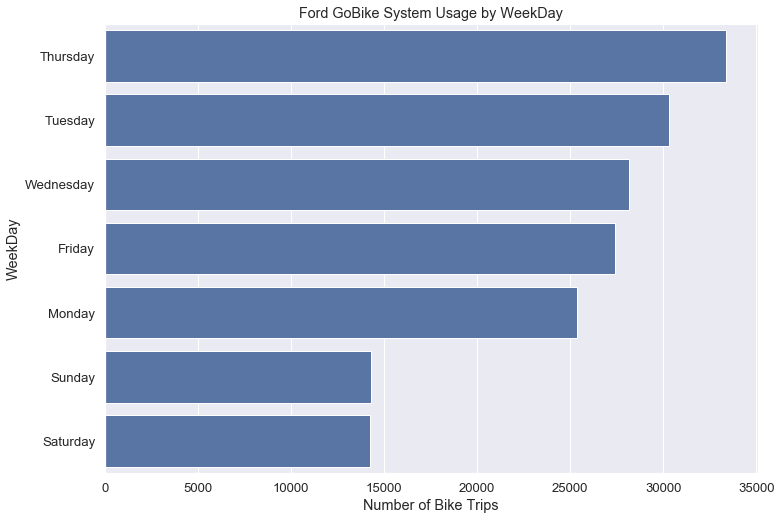

In [61]:
# Countplot to visualize WeekDays usage of Bike trips..
uniVisualize_countplot(df=df,y='start_week',ylabel='WeekDay',xlabel='Number of Bike Trips',
                       title='Ford GoBike System Usage by WeekDay')

**- As We See above, Thursday is the day that most mubers of bike trips and Saturday and Sunday are the least ad they are the weekends.**

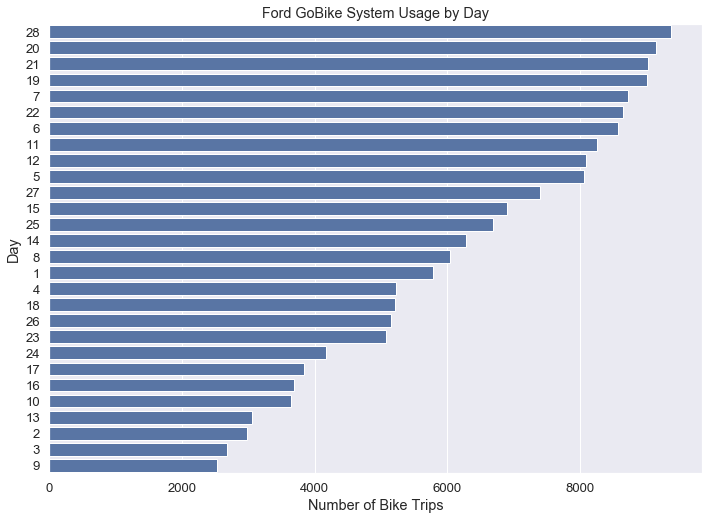

In [62]:
# Countplot to visualize MonthDays usage of Bike trips..
uniVisualize_countplot(df=df,y='start_day',ylabel='Day',xlabel='Number of Bike Trips',
                       title='Ford GoBike System Usage by Day')

**- As we see, there are no obvious trend but i Think it takes the trend that the weekends are the least and thursdays have the most number of bike trips.**

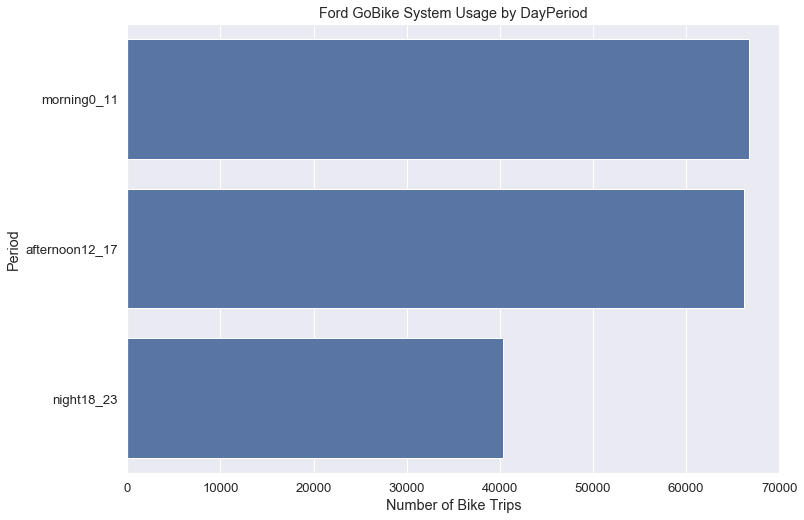

In [63]:
# Countplot to visualize DayPeriods usage of Bike trips..
uniVisualize_countplot(df=df,y='day_period',ylabel='Period',xlabel='Number of Bike Trips',
                       title='Ford GoBike System Usage by DayPeriod')

**- As we see, morning and after noon number of trips are double of night trips.**

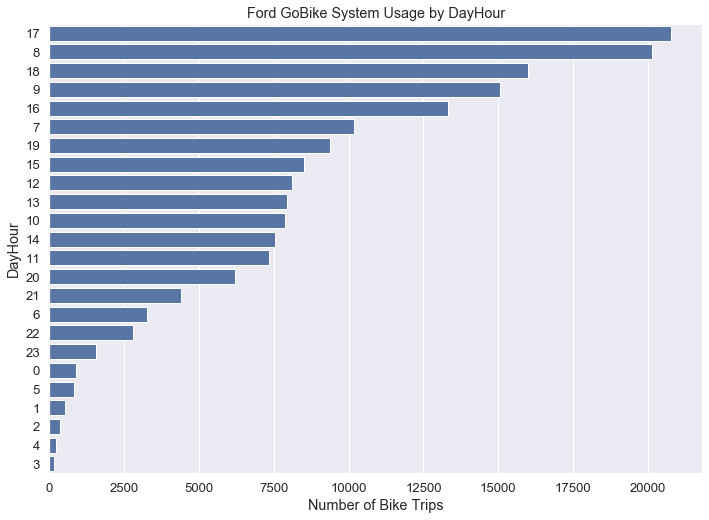

In [64]:
# Countplot to visualize StartHour usage of Bike trips..
uniVisualize_countplot(df=df,y='start_hour',ylabel='DayHour',xlabel='Number of Bike Trips',
                       title='Ford GoBike System Usage by DayHour')

**- As we see in the above, the middel day hours and morning hours are the most numbers of trip but in my opinion this figure is better visualization than pervious one.**

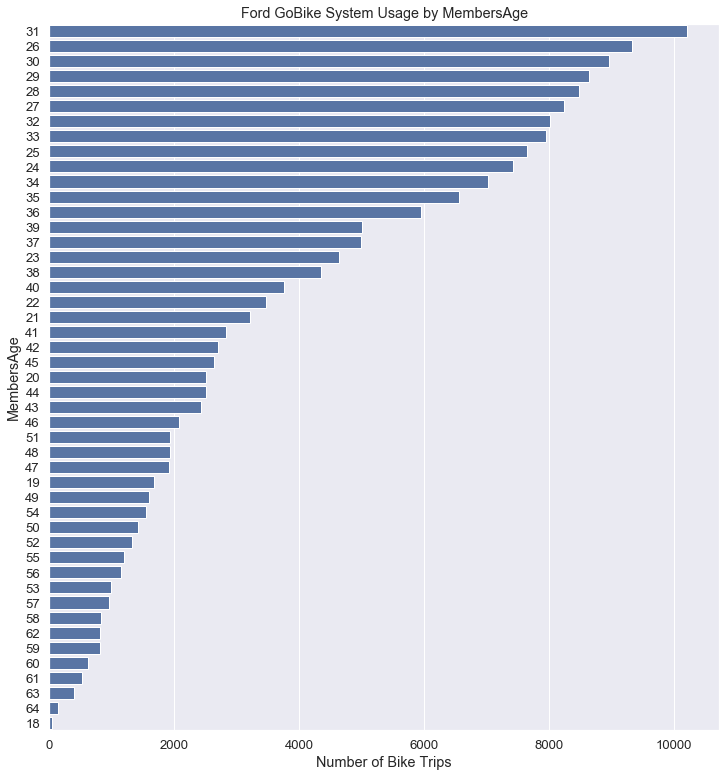

In [65]:
# Countplot to visualize MembersAges usage of Bike trips..
uniVisualize_countplot(df=df,y='member_age',xsize=12,ysize=13,ylabel='MembersAge',xlabel='Number of Bike Trips',
                       title='Ford GoBike System Usage by MembersAge')

**- As we see, the range from 24 to 36 are the most bikers and range 49 to 64 are the least but 18 year old are the least because it seems the data for this age is lower than other ages.**

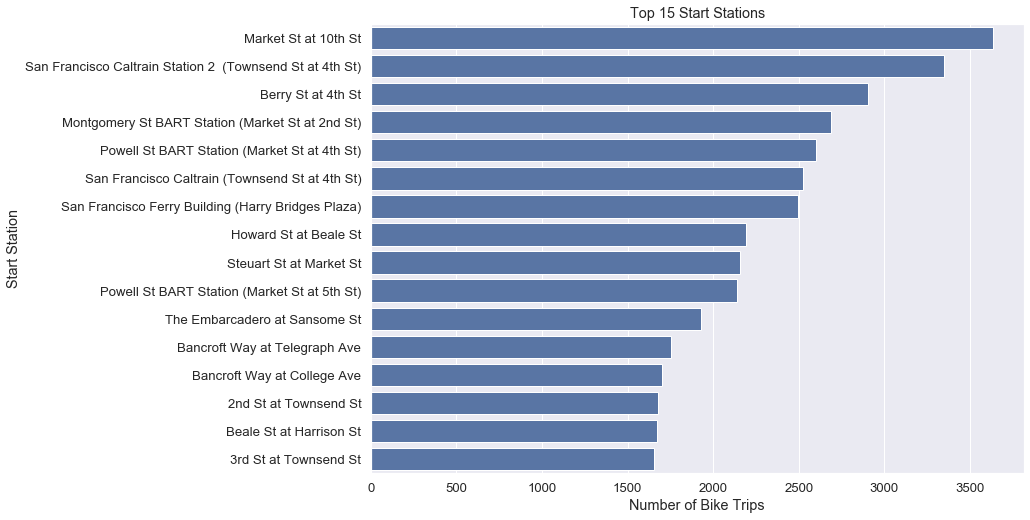

In [66]:
# Countplot to visualize the most 15 StartStations use Bike trips..
uniVisualize_countplot(df=df,i=16,y='start_station_name',xlabel='Number of Bike Trips',ylabel='Start Station',
                       title='Top 15 Start Stations')

**- As we see, these are the most start stations that have higer number of bike trips.**

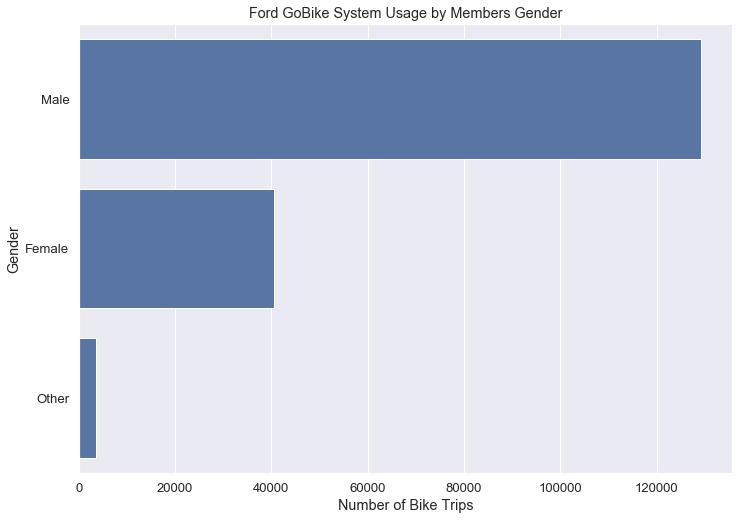

In [67]:
# Countplot to visualize MembersGender usage of Bike trips..
uniVisualize_countplot(df=df,y='member_gender',xlabel='Number of Bike Trips',ylabel='Gender',
                       title='Ford GoBike System Usage by Members Gender')

**- As we see, the most bike trips are by male gender.**

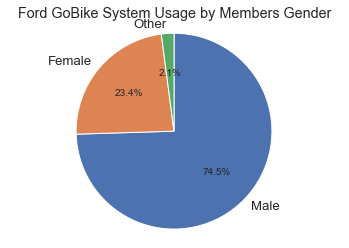

In [68]:
# PieChart to visualize MembersGender usage of Bike trips..
sorted_counts = df['member_gender'].value_counts()
my_labels=df['member_gender'].value_counts().index
plt.pie(sorted_counts,labels=my_labels,autopct='%1.1f%%',startangle = 90, counterclock = False)
plt.title('Ford GoBike System Usage by Members Gender')
plt.axis('equal')
plt.show()

**- As we see before, the most bike trips percentage are by male gender.**

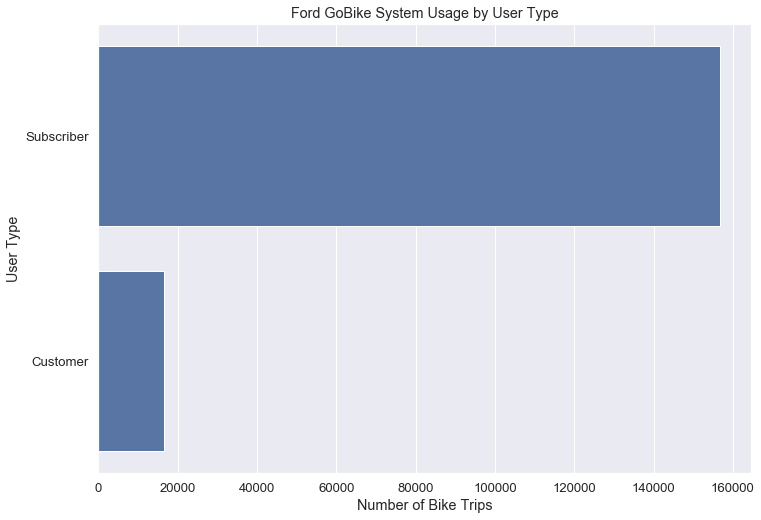

In [69]:
# Countplot to visualize UserTypes usage of Bike trips..
uniVisualize_countplot(df=df,y='user_type',xlabel='Number of Bike Trips',ylabel='User Type',
                       title='Ford GoBike System Usage by User Type')

**- As we see, the most number of bike trips are by subscriber users than customer and i think it because the subscribers have offers for bike trips.**

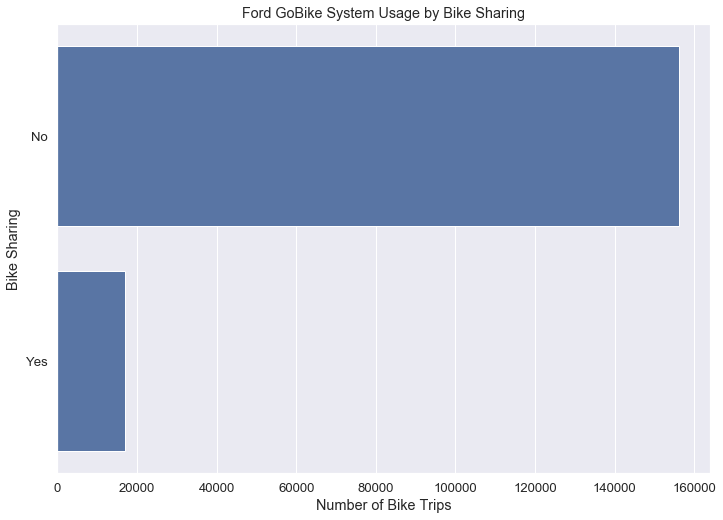

In [70]:
# Countplot to visualize BikeSharingSystem usage of Bike trips..
uniVisualize_countplot(df=df,y='bike_share_for_all_trip',xlabel='Number of Bike Trips',ylabel='Bike Sharing',title='Ford GoBike System Usage by Bike Sharing')

**- As We see, The most users arenot share their trips. though i think the system needs some modification to motivate the users to share more trips.** 

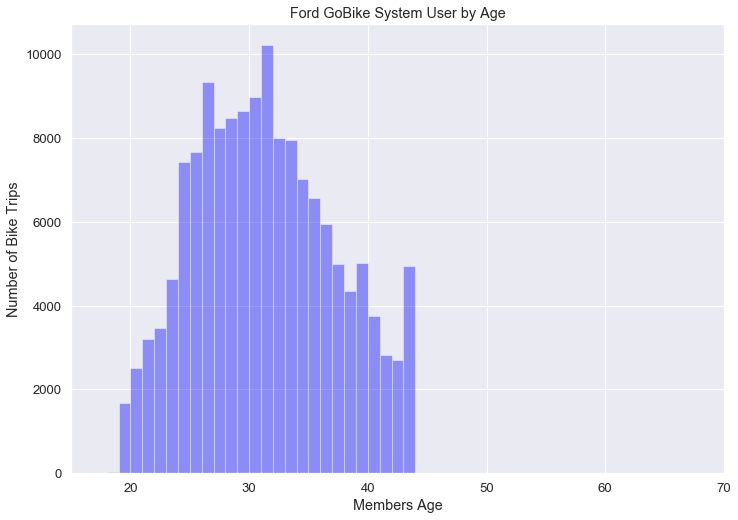

In [71]:
# Distplot to visualize Age usage of Bike trips..
uniVisualize_distplot(df=df,x1=15,x2=70,x='member_age',xlabel='Members Age',ylabel='Number of Bike Trips',title='Ford GoBike System User by Age')

**- As we see,this figure prove again as before countplot that the range from 24 to 36 are the most bikers and range 49 to 64 are the least but 18 year old are the least because it seems the data for this age is lower than other ages.**

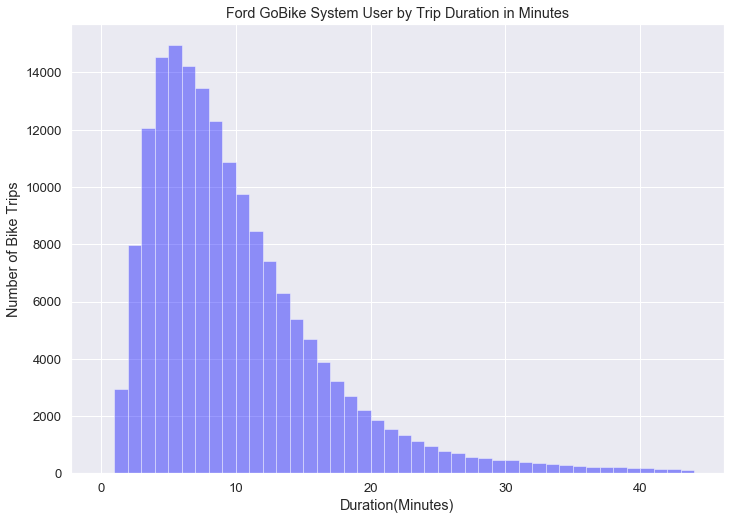

In [72]:
# Distplot to visualize Trend of Duration(minutes) usage of Bike trips..
uniVisualize_distplot(df=df,x='duration_min',xlabel='Duration(Minutes)',ylabel='Number of Bike Trips',title='Ford GoBike System User by Trip Duration in Minutes')

**- As we see, the most trips duration are between 1 to 15 minutes.**

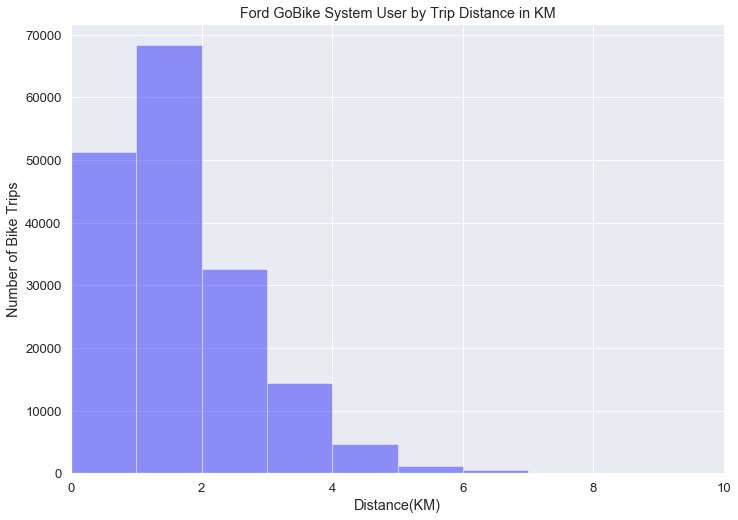

In [73]:
# Distplot to visualize Trend of Distance(KM) usage of Bike trips..
uniVisualize_distplot(df=df,x1=0,x2=10,x='distance_km',xlabel='Distance(KM)',ylabel='Number of Bike Trips',title='Ford GoBike System User by Trip Distance in KM')

**- As we see, the most trips distance are from 1 to 2 km and the range of all trips from 0 to 5 km and rare who above 5 km. it should be noted that the trips with distance 0 km mean that the start and end station are the same but they made a trip, though we will visualize that with the duration to get more insights.**

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

---------------------------

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the data show a great visualization and give me more insights about the data but it needs more data and data for difference months and years to be more generalize but here the data for only one month. But in the next exploration i will make more visualization and i hope that give more insights.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No, i didn't change the form of data because i create more columns in the cleaning step for better visualization.

-------------------

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [74]:
# Check sample of the data..
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_date,year,start_month,start_week,start_day,start_hour,end_hour,duration_min,day_period,distance_km
77229,782,2019-02-19 07:24:39.800,2019-02-19 07:37:42.504,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,14,Clay St at Battery St,37.795001,-122.399970,1615,Subscriber,1968,Male,No,51,2019-02-19,2019,February,Tuesday,19,7,7,13.033333,morning0_11,2.079400
181802,504,2019-02-01 08:51:34.486,2019-02-01 08:59:58.757,42,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,90,Townsend St at 7th St,37.771058,-122.402717,2310,Subscriber,1981,Male,No,38,2019-02-01,2019,February,Friday,1,8,8,8.400000,morning0_11,1.604146
160123,523,2019-02-05 17:20:31.122,2019-02-05 17:29:14.999,16,Steuart St at Market St,37.794130,-122.394430,81,Berry St at 4th St,37.775880,-122.393170,5255,Subscriber,1994,Female,No,25,2019-02-05,2019,February,Tuesday,5,17,17,8.716667,afternoon12_17,2.032964
91402,382,2019-02-16 08:47:47.161,2019-02-16 08:54:10.130,343,Bryant St at 2nd St,37.783172,-122.393572,79,7th St at Brannan St,37.773492,-122.403673,5371,Subscriber,1959,Female,No,60,2019-02-16,2019,February,Saturday,16,8,8,6.366667,morning0_11,1.395643
111278,987,2019-02-12 17:05:27.258,2019-02-12 17:21:54.611,26,1st St at Folsom St,37.787290,-122.394380,39,Scott St at Golden Gate Ave,37.778999,-122.436861,4744,Subscriber,1972,Male,No,47,2019-02-12,2019,February,Tuesday,12,17,17,16.450000,afternoon12_17,3.846611
91931,263,2019-02-15 21:15:41.761,2019-02-15 21:20:04.836,160,West Oakland BART Station,37.805318,-122.294837,236,Market St at 8th St,37.803686,-122.282497,6449,Subscriber,1979,Male,No,40,2019-02-15,2019,February,Friday,15,21,21,4.383333,night18_23,1.099522
129757,492,2019-02-10 07:36:08.962,2019-02-10 07:44:21.446,76,McCoppin St at Valencia St,37.771662,-122.422423,95,Sanchez St at 15th St,37.766219,-122.431060,5445,Subscriber,1966,Male,No,53,2019-02-10,2019,February,Sunday,10,7,7,8.200000,morning0_11,0.971241
178573,460,2019-02-01 16:52:59.941,2019-02-01 17:00:40.893,23,The Embarcadero at Steuart St,37.791464,-122.391034,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5494,Subscriber,1961,Male,No,58,2019-02-01,2019,February,Friday,1,16,17,7.666667,afternoon12_17,1.695186
131889,1387,2019-02-09 10:14:24.561,2019-02-09 10:37:32.004,144,Precita Park,37.747300,-122.411403,26,1st St at Folsom St,37.787290,-122.394380,4996,Customer,1991,Female,No,28,2019-02-09,2019,February,Saturday,9,10,10,23.116667,morning0_11,4.693206
30824,461,2019-02-24 18:18:36.283,2019-02-24 18:26:18.132,109,17th St at Valencia St,37.763316,-122.421904,59,S Van Ness Ave at Market St,37.774814,-122.418954,6250,Subscriber,1999,Female,No,20,2019-02-24,2019,February,Sunday,24,18,18,7.683333,night18_23,1.304978


In [75]:
# Check the info and Dtypes of the columns..
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173272 entries, 0 to 183411
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173272 non-null  int64         
 1   start_time               173272 non-null  datetime64[ns]
 2   end_time                 173272 non-null  datetime64[ns]
 3   start_station_id         173272 non-null  int32         
 4   start_station_name       173272 non-null  object        
 5   start_station_latitude   173272 non-null  float64       
 6   start_station_longitude  173272 non-null  float64       
 7   end_station_id           173272 non-null  int32         
 8   end_station_name         173272 non-null  object        
 9   end_station_latitude     173272 non-null  float64       
 10  end_station_longitude    173272 non-null  float64       
 11  bike_id                  173272 non-null  int64         
 12  user_type       

In [76]:
# Extract the numeric columns from the data frame..
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_columns = df.select_dtypes(include=numerics).columns

In [77]:
# Display the numeric columns names..
numeric_columns

Index(['duration_sec', 'start_station_id', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_latitude',
       'end_station_longitude', 'bike_id', 'member_birth_year', 'member_age',
       'year', 'start_day', 'start_hour', 'end_hour', 'duration_min',
       'distance_km'],
      dtype='object')

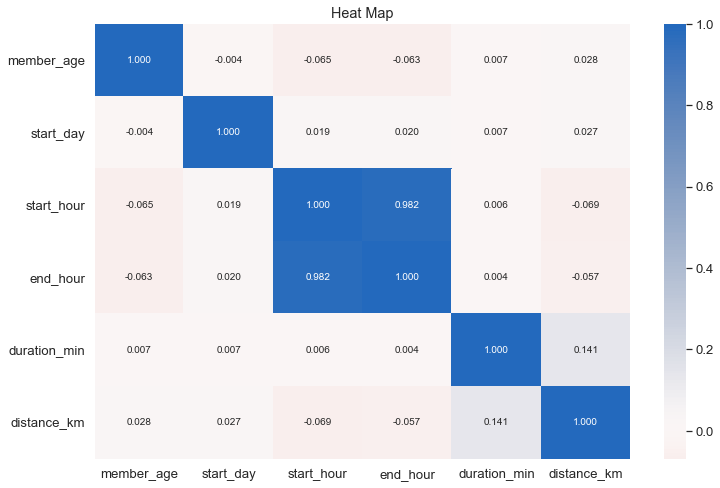

In [78]:
# Plot heat map betwwen the interested numeric columns..
numeric_col=['member_age','start_day', 'start_hour', 'end_hour', 'duration_min','distance_km']
plt.figure(figsize = [12, 8])
ax = plt.axes()
sb.heatmap(df[numeric_col].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0,ax=ax)
ax.set_title('Heat Map')
plt.show()

**- As we see, there are relation between `start_hour, end_hour` and `duration_min, distance_km`.**

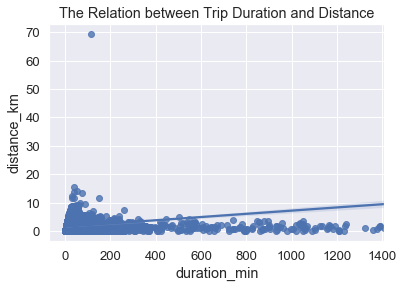

In [79]:
# Plot regression plot between duration and distance to get the relations between them..
ax = plt.axes()
sb.regplot(data=df,x='duration_min', y='distance_km',ax=ax);
ax.set_title("The Relation between Trip Duration and Distance")
plt.show()

**- As we see, there is an outliers that make the visualization bad though we will enchance it by remove the outlier as below.**

In [80]:
# See the filter of distance > 20 Km..
df[df.distance_km>20]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_date,year,start_month,start_week,start_day,start_hour,end_hour,duration_min,day_period,distance_km
112038,6945,2019-02-12 14:28:44.402,2019-02-12 16:24:30.158,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,300,Palm St at Willow St,37.317298,-121.884995,4780,Subscriber,1985,Female,No,34,2019-02-12,2019,February,Tuesday,12,14,16,115.75,afternoon12_17,69.491049


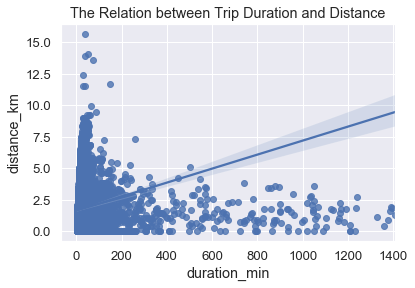

In [81]:
# Plot regression plot again but with remover the outlier to be more accuracy..
ax = plt.axes()
sb.regplot(data=df[df.distance_km<=20],x='duration_min', y='distance_km',ax=ax)
ax.set_title("The Relation between Trip Duration and Distance")
plt.show()

**- As we see now, the figure is better than previous one and we could say that with increase the distance the duration of trip increse but as i mentioned before that at 0 distance there are trip duration and that becuase the fact that may the start and end station the same but they make a trip an go back to the same start point.**

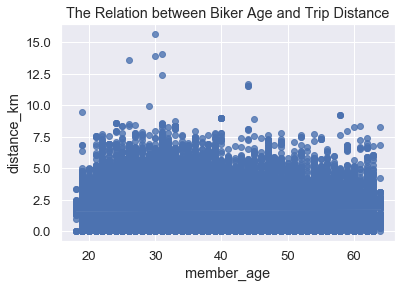

In [82]:
# Plot regression plot between member age and distance to get the relations between them..
ax = plt.axes()
sb.regplot(data=df[df.distance_km<=20],x='member_age', y='distance_km',ax=ax)
ax.set_title("The Relation between Biker Age and Trip Distance")
plt.show()

**- As we see, there isn't a obvious trend.**

In [83]:
# Define a function for countplot in seabor for simpler code..
def biVisualize_countplot(df,xlabel,ylabel,title,hue,x=None ,i=None,xsize=11.7,ysize=8.27):
    """
    This Function to plot the Count plot in seaborn between two variables to visualize the relation and efeect
    between that variables.
    
    That we input the x(first Variable),dataframe(df), lables(x,y labels), titles,hue(the second Variable), sizes of Axes 
    and "i" (for the index of the order).
    """
    fig, ax = plt.subplots()
    ax= sb.countplot(data=df,x=x,hue=hue,order=df[x].value_counts().index[:i])
    ax.set(xlabel=xlabel, ylabel=ylabel, title= title)
    fig.set_size_inches(xsize, ysize)
    plt.show()

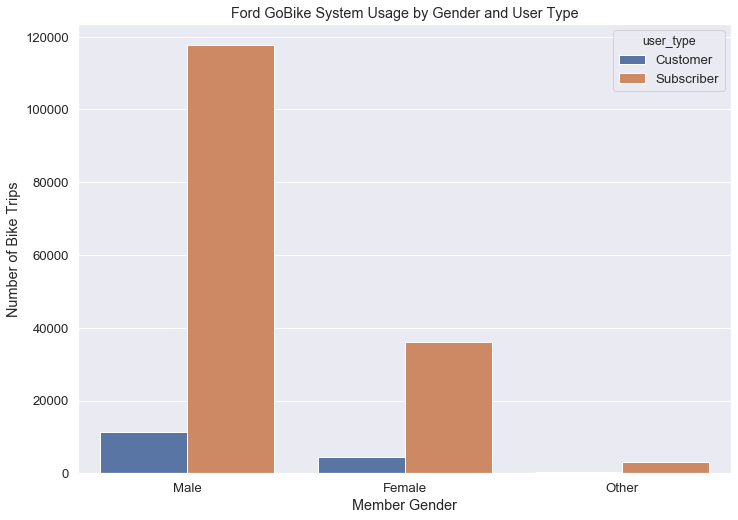

In [84]:
# Countplot between member_gender and user_type to visualize their effect on Bike trips..
biVisualize_countplot(df=df,x='member_gender',hue='user_type', xlabel='Member Gender',ylabel='Number of Bike Trips',
                      title='Ford GoBike System Usage by Gender and User Type' )

**- As we see, it another prove that males are more as subscriber and customer than Feamles.**

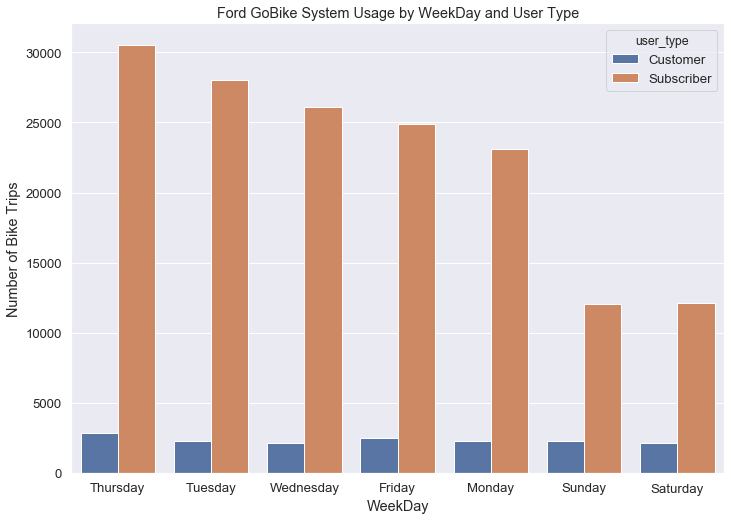

In [85]:
# Countplot between start_week and user_type to visualize their effect on Bike trips..
biVisualize_countplot(df=df,x='start_week',hue='user_type', xlabel='WeekDay',ylabel='Number of Bike Trips',
                      title='Ford GoBike System Usage by WeekDay and User Type' )

**- As we see, the subscibers are more than customers in all week days but the customers number of bike trip is the same in all weekdays.**

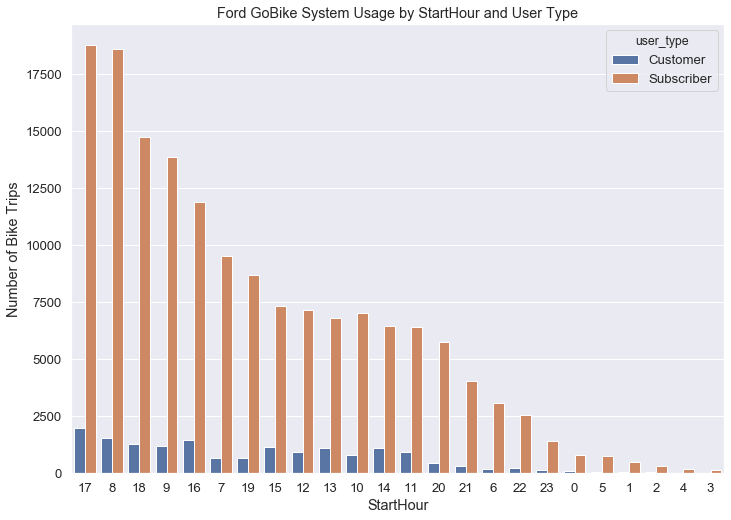

In [86]:
# Countplot between start_hour and user_type to visualize their effect on Bike trips..
biVisualize_countplot(df=df,x='start_hour',hue='user_type', xlabel='StartHour',ylabel='Number of Bike Trips',
                      title='Ford GoBike System Usage by StartHour and User Type')

**- As we see, the least hours that have bike trips are from 10pm to 6am and the highest hours are 3pm to 7pm and from 7am to 9am. And the subscribers are higher for all hours.**

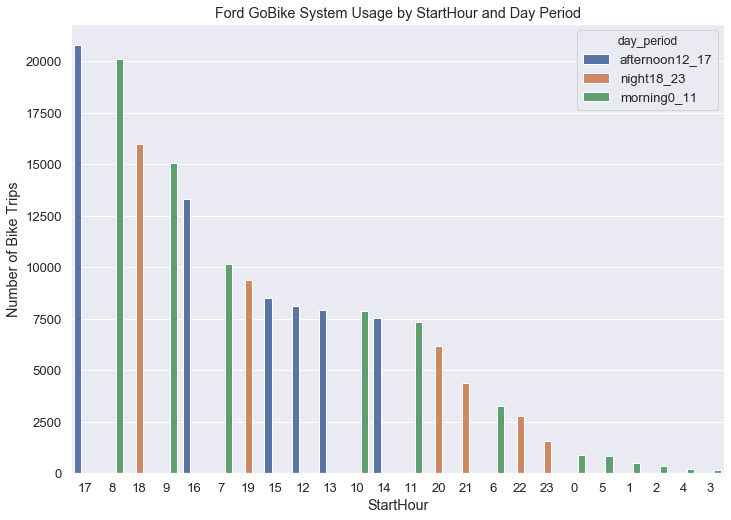

In [87]:
# Countplot between start_hour and day_period to visualize their effect on Bike trips..
biVisualize_countplot(df=df,x='start_hour',hue='day_period', xlabel='StartHour',ylabel='Number of Bike Trips',
                      title='Ford GoBike System Usage by StartHour and Day Period')

**- As we see, the most hours with trips are morning and afternoon but also there are some hours at night with high trips but that didn't obvious in previous plots as we said that morninig and afternoon trips are double the night trips.**

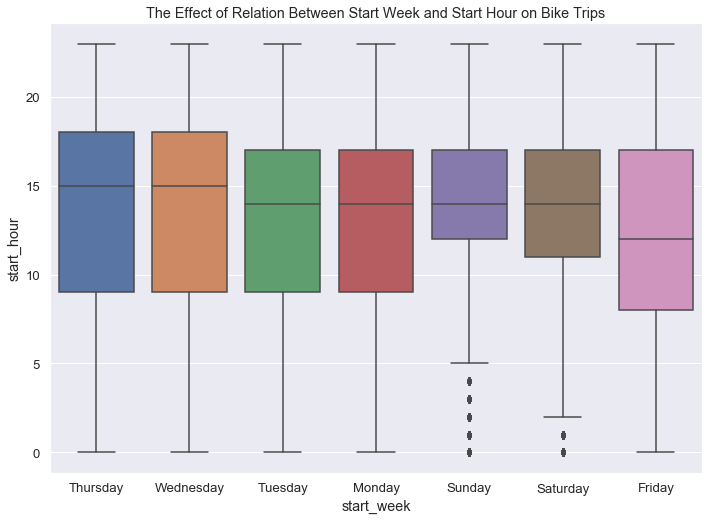

In [88]:
# Boxplot between start_week and start_hour to visualize their effect on Bike trips..
fig, ax = plt.subplots()
ax=sb.boxplot(x="start_week", y="start_hour",data=df)
ax.set_title('The Effect of Relation Between Start Week and Start Hour on Bike Trips')
fig.set_size_inches(11.7, 8.27)
plt.show()

**- As we see, there is a symetry for median of start hour for all weekdays which is between 14 to 15 but for only friday it is 11 to 12.**

**- For sure as we said before, the weekend days (Sunday and Saturdays) are the least.**

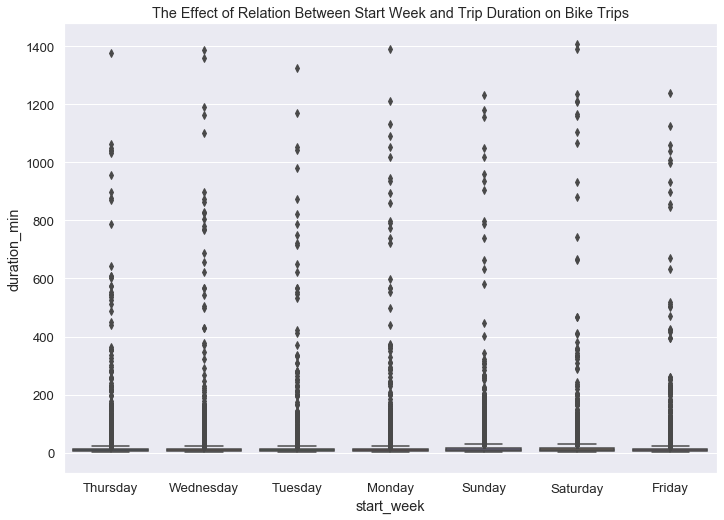

In [89]:
# Boxplot between start_week and duration_min to visualize their effect on Bike trips..
fig, ax = plt.subplots()
ax=sb.boxplot(x="start_week", y="duration_min",data=df)
ax.set_title('The Effect of Relation Between Start Week and Trip Duration on Bike Trips')
fig.set_size_inches(11.7, 8.27)
plt.show()

**- As we see, there are a lot of outliers though we can't visualize anything.**

In [90]:
# Check the statistical details of duration_min
df.duration_min.describe()

count    173272.000000
mean         11.731309
std          27.455094
min           1.016667
25%           5.383333
50%           8.500000
75%          13.133333
max        1409.133333
Name: duration_min, dtype: float64

**- As we see 75% of the data is 13 min though we will try more steps for better visualization.**

In [91]:
# Check the percentiles of 99% of the data to visualize the outliers and non-valid values..
df.duration_min.describe(percentiles = [0.99])

count    173272.000000
mean         11.731309
std          27.455094
min           1.016667
50%           8.500000
99%          52.921500
max        1409.133333
Name: duration_min, dtype: float64

**- As we see 99% of the data don't above 53 min. though we will filter out the outliers for clear visulaization.**

In [92]:
# Check that for duration_min>53 condition..
df[df.duration_min>53]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_date,year,start_month,start_week,start_day,start_hour,end_hour,duration_min,day_period,distance_km
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35,2019-02-28,2019,February,Thursday,28,17,8,869.750000,afternoon12_17,0.544879
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47,2019-02-28,2019,February,Thursday,28,12,5,1030.900000,afternoon12_17,2.705394
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30,2019-02-28,2019,February,Thursday,28,17,4,608.166667,afternoon12_17,0.260820
55,3478,2019-02-28 22:39:35.020,2019-02-28 23:37:33.342,11,Davis St at Jackson St,37.797280,-122.398436,11,Davis St at Jackson St,37.797280,-122.398436,1846,Subscriber,1995,Male,No,24,2019-02-28,2019,February,Thursday,28,22,23,57.966667,night18_23,0.000000
91,5621,2019-02-28 21:41:16.900,2019-02-28 23:14:58.186,252,Channing Way at Shattuck Ave,37.865847,-122.267443,244,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5244,Subscriber,1997,Female,No,22,2019-02-28,2019,February,Thursday,28,21,23,93.683333,night18_23,0.875699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181707,3980,2019-02-01 07:58:36.852,2019-02-01 09:04:57.425,141,Valencia St at Cesar Chavez St,37.747998,-122.420219,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5454,Subscriber,1975,Female,Yes,44,2019-02-01,2019,February,Friday,1,7,9,66.333333,morning0_11,5.746474
181850,3497,2019-02-01 07:58:41.447,2019-02-01 08:56:58.634,141,Valencia St at Cesar Chavez St,37.747998,-122.420219,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5226,Subscriber,1973,Male,Yes,46,2019-02-01,2019,February,Friday,1,7,8,58.283333,morning0_11,5.746474
182133,6086,2019-02-01 07:00:02.042,2019-02-01 08:41:28.251,380,Masonic Ave at Turk St,37.779047,-122.447291,377,Fell St at Stanyan St,37.771917,-122.453704,4956,Subscriber,1971,Other,No,48,2019-02-01,2019,February,Friday,1,7,8,101.433333,morning0_11,0.973049
182411,13609,2019-02-01 04:38:43.601,2019-02-01 08:25:33.493,106,Sanchez St at 17th St,37.763242,-122.430675,79,7th St at Brannan St,37.773492,-122.403673,4944,Subscriber,1982,Male,Yes,37,2019-02-01,2019,February,Friday,1,4,8,226.816667,morning0_11,2.633763


**- As we see, only 1728 rows are the outliers. Though we could remove them or filter them only during the visualization as we will see below.**

In [93]:
# Check that for duration_min<= 53 condition..
df[df.duration_min<=53]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_date,year,start_month,start_week,start_day,start_hour,end_hour,duration_min,day_period,distance_km
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45,2019-02-28,2019,February,Thursday,28,23,0,26.416667,night18_23,2.410058
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60,2019-02-28,2019,February,Thursday,28,23,0,29.883333,night18_23,3.333249
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,36,2019-02-28,2019,February,Thursday,28,23,0,19.116667,night18_23,2.029188
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,30,2019-02-28,2019,February,Thursday,28,23,0,26.916667,night18_23,4.533991
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,31,2019-02-28,2019,February,Thursday,28,23,0,26.166667,night18_23,4.533991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996,Male,No,23,2019-02-01,2019,February,Friday,1,0,0,8.000000,morning0_11,1.465226
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984,Male,No,35,2019-02-01,2019,February,Friday,1,0,0,5.216667,morning0_11,1.403156
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990,Male,Yes,29,2019-02-01,2019,February,Friday,1,0,0,2.350000,morning0_11,0.379185
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988,Male,No,31,2019-02-01,2019,February,Friday,1,0,0,2.316667,morning0_11,0.747517


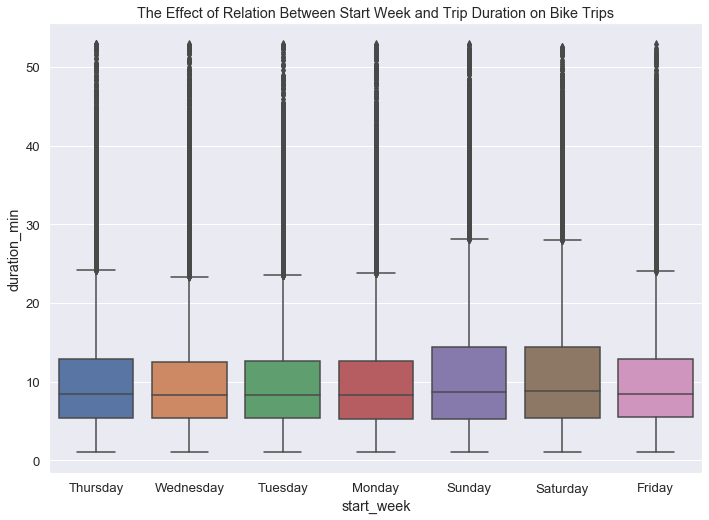

In [94]:
# Boxplot again between start_week and duration_min but with remove the outlier to be more accuracy..
fig, ax = plt.subplots()
ax=sb.boxplot(x="start_week", y="duration_min",data=df[df.duration_min<=53])
ax.set_title('The Effect of Relation Between Start Week and Trip Duration on Bike Trips')
fig.set_size_inches(11.7, 8.27)
plt.show()

**- As we see now after filter some of the outliers, it is better visualizing and it seems that at (Sunday and Saturdays) the trips duration is higher than for other weekdays.**

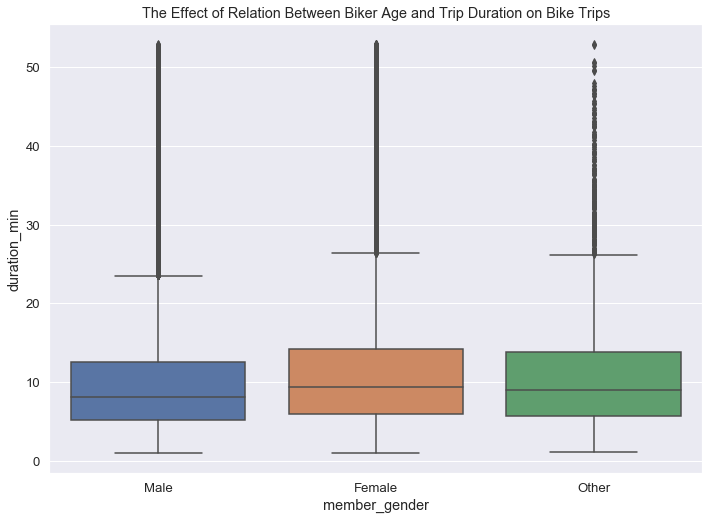

In [95]:
# Boxplot again between member_gender and duration_min but with remove the outlier to be more accuracy..
fig, ax = plt.subplots()
ax=sb.boxplot(x="member_gender", y="duration_min",data=df[df.duration_min<=53])
ax.set_title('The Effect of Relation Between Biker Age and Trip Duration on Bike Trips')
fig.set_size_inches(11.7, 8.27)
plt.show()

**- As we see, we can say that the median trips duration for females is slightly higher than males despite of the number of males are higher.**

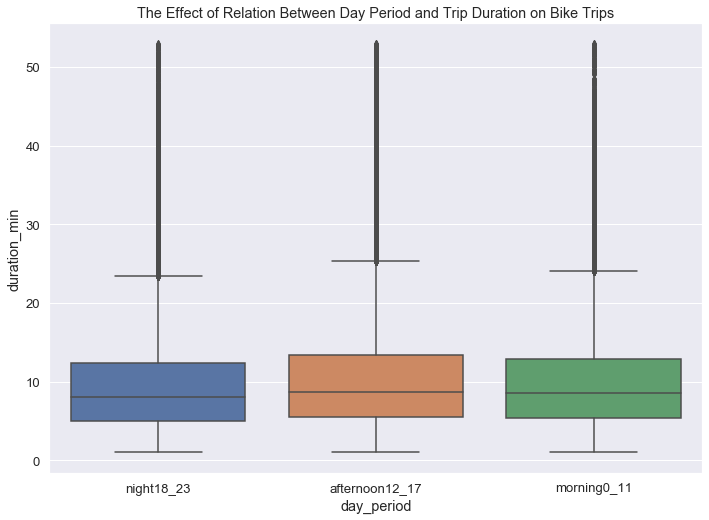

In [96]:
# Boxplot again between day_period and duration_min but with remove the outlier to be more accuracy..
fig, ax = plt.subplots()
ax=sb.boxplot(x="day_period", y="duration_min",data=df[df.duration_min<=53])
ax.set_title('The Effect of Relation Between Day Period and Trip Duration on Bike Trips')
fig.set_size_inches(11.7, 8.27)
plt.show()

**- As we see, we can say that the median trips duration for afternoon period is slightly higher than other periods.**

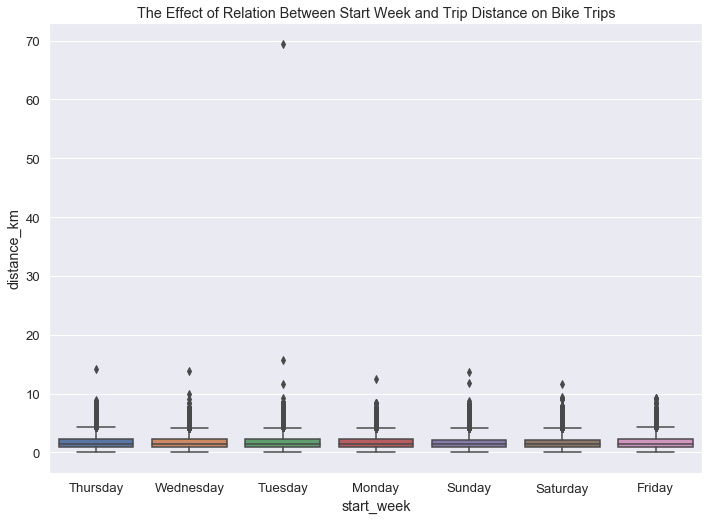

In [97]:
# Boxplot between start_week and distance_km to visualize their effect on Bike trips....
fig, ax = plt.subplots()
ax=sb.boxplot(x="start_week", y="distance_km",data=df)
ax.set_title('The Effect of Relation Between Start Week and Trip Distance on Bike Trips')
fig.set_size_inches(11.7, 8.27)
plt.show()

**- As we see, there are a lot of outliers though we can't visualize anything.**

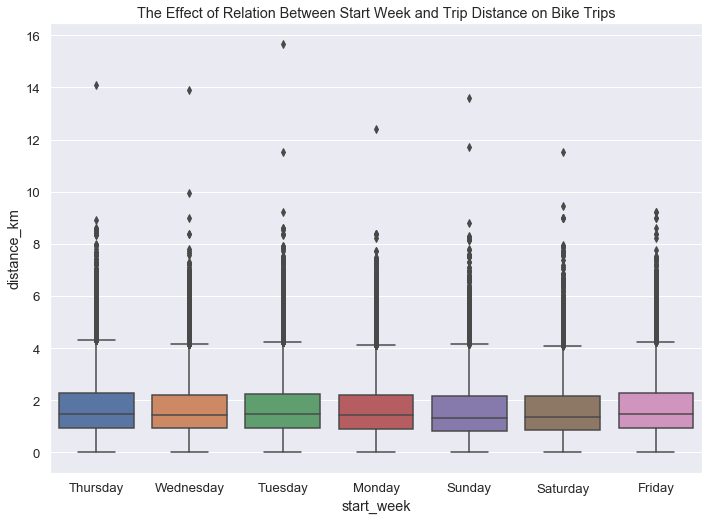

In [98]:
# Boxplot again between start_week and distance_km but with remove the outlier to be more accuracy..
fig, ax = plt.subplots()
ax=sb.boxplot(x="start_week", y="distance_km",data=df[df.distance_km<=20])
ax.set_title('The Effect of Relation Between Start Week and Trip Distance on Bike Trips')
fig.set_size_inches(11.7, 8.27)
plt.show()

**- As we see, the median distance for all week days are almost the same.**

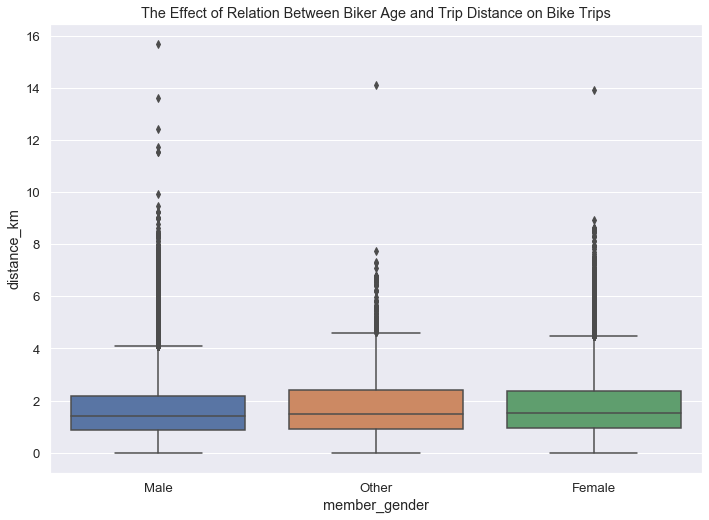

In [99]:
# Boxplot again between member_gender and distance_km but with remove the outlier to be more accuracy..
fig, ax = plt.subplots()
ax=sb.boxplot(x="member_gender", y="distance_km",data=df[df.distance_km<=20])
ax.set_title('The Effect of Relation Between Biker Age and Trip Distance on Bike Trips')
fig.set_size_inches(11.7, 8.27)
plt.show()

**- As we see, we can also say that the median trips distance for females is slightly higher than males despite of the number of males are higher.**

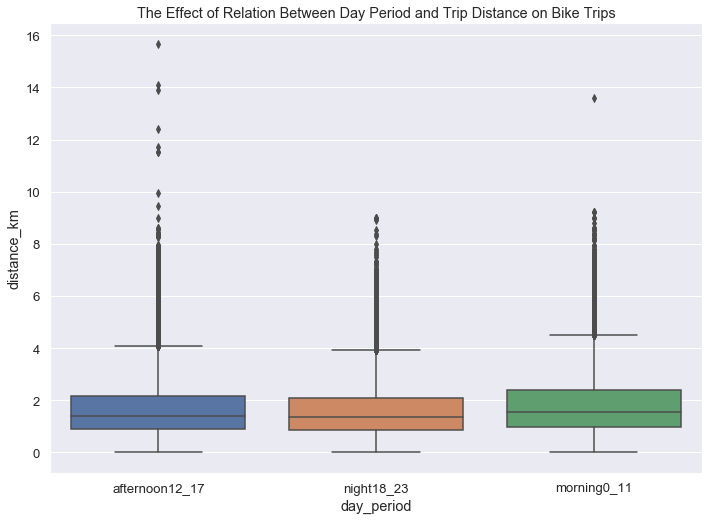

In [100]:
# Boxplot again between day_period and distance_km but with remove the outlier to be more accuracy..
fig, ax = plt.subplots()
ax=sb.boxplot(x="day_period", y="distance_km",data=df[df.distance_km<=20])
ax.set_title('The Effect of Relation Between Day Period and Trip Distance on Bike Trips')
fig.set_size_inches(11.7, 8.27)
plt.show()

**- As we see, we can say that the trips distance for morning periods is slightly higher than other periods and that may because the bikers go to their work by bikes.**

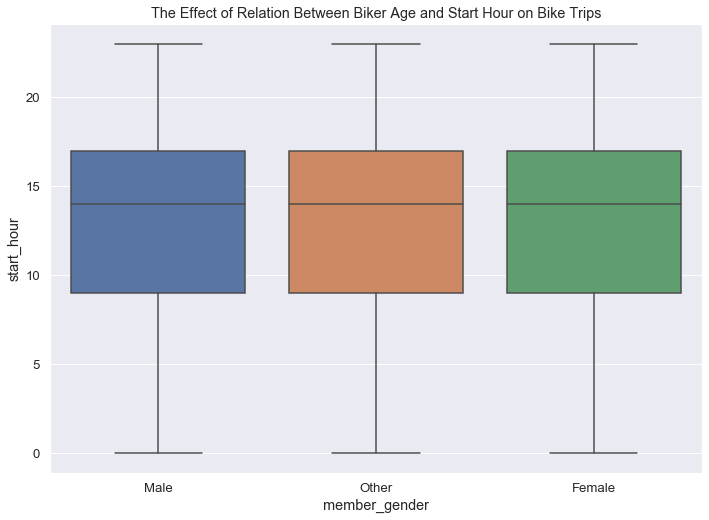

In [101]:
# Boxplot between member_gender and start_hour to visualize their effect on Bike trips..
fig, ax = plt.subplots()
ax=sb.boxplot(x="member_gender", y="start_hour",data=df)
ax.set_title('The Effect of Relation Between Biker Age and Start Hour on Bike Trips')
fig.set_size_inches(11.7, 8.27)
plt.show()

**- Most star_hours are between 9 to 18 for all genders and also the median start hour is the same.**

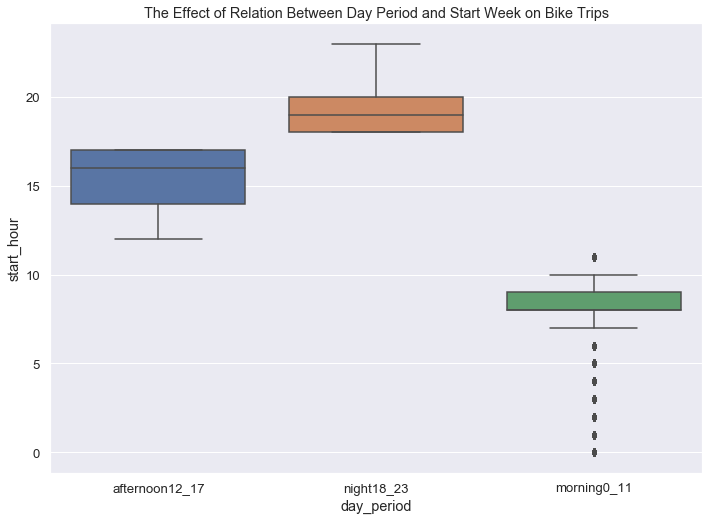

In [102]:
# Boxplot between day_period and start_hour to visualize their effect on Bike trips..
fig, ax = plt.subplots()
ax=sb.boxplot(x="day_period", y="start_hour",data=df)
ax.set_title('The Effect of Relation Between Day Period and Start Week on Bike Trips')
fig.set_size_inches(11.7, 8.27)
plt.show()

**- we can say that the median for afternoon and night periods is closer. the spread of data for morning period is between 10 to 11.**

-------------------

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> **- There is relation between `start_hour, end_hour` and `duration_min, distance_km`.**

> **- We could say that with increase the distance the duration of trip increse but as i mentioned before that at 0 distance there are trip duration and that becuase the fact that may the start and end station the same but they make a trip an go back to the same start point.**

> **- There isn't a obvious trend between duration and distance.**

> **- There is another prove that males are more as subscriber and customer than Feamles.**

> **- The subscibers are more than customers in all week days but the customers number of bike trip is the same in all weekdays.**

> **- The least hours that have bike trips are from 10pm to 6am and the highest hours are 3pm to 7pm and from 7am to 9am. And the subscribers are higher for all hours. Besides,the most hours with trips are morning and afternoon but also there are some hours at night with high trips but that didn't obvious in previous plots as we said in perivious section that morninig and afternoon trips are double the night trips.**

> **- There is a symetry for median of start hour for all weekdays which is between 14 to 15 but for only friday it is 11 to 12.**

> **- As we said before, the weekend days (Sunday and Saturdays) are the least number of bike Trips.But it seems that at (Sunday and Saturdays) the trips duration is higher than for other weekdays.**

> **- The median trips duration for females is slightly higher than males despite of the number of males are higher and for afternoon period is slightly higher than other periods.**

> **- The median distance for all week days are almost the same But we can say that the median trips distance for females is slightly higher than males despite of the number of males are higher and for morning periods is slightly higher than other periods and that may because the bikers go to their work by bikes.**

> **- Most star_hours are between 9 to 18 for all genders and also the median start hour is the same.**

> **- The median star_hour for afternoon and night periods is closer. the spread of data for morning period is between 10 to 11.**

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No, because i obsever all features and i state all relationships between them.

---------------

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [103]:
# Check the columns names..
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'member_age', 'start_date', 'year', 'start_month', 'start_week',
       'start_day', 'start_hour', 'end_hour', 'duration_min', 'day_period',
       'distance_km'],
      dtype='object')

Text(0.5, 0.98, 'PairGrid Plot to visulaize relations between different varialbes')

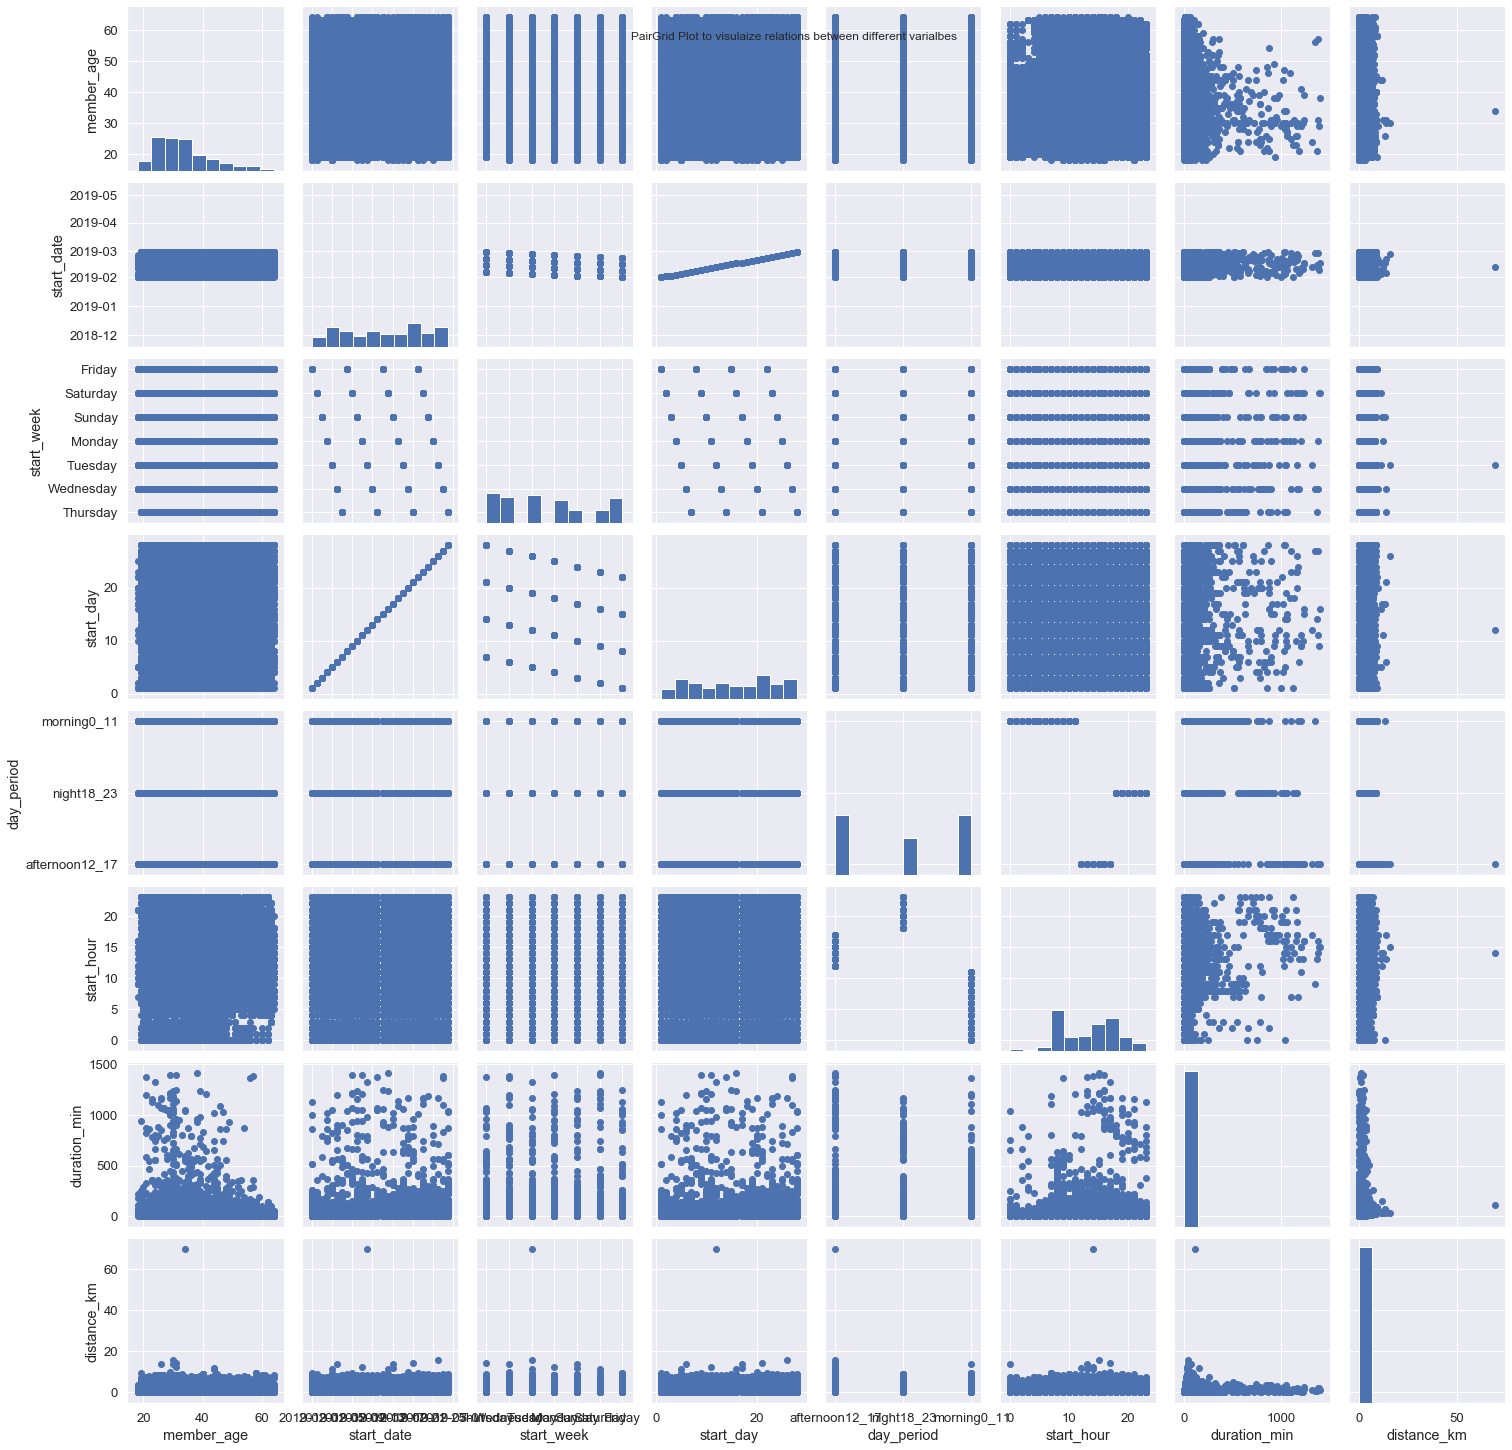

In [104]:
# PairGrid Plot to visulaize relations between different varialbes..
g = sb.PairGrid(data = df, vars = ['member_age', 'start_date', 'start_week','start_day','day_period', 'start_hour','duration_min', 'distance_km'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.fig.suptitle("PairGrid Plot to visulaize relations between different varialbes")

**- As we see, we can't get more visualize from that plot more than we said before.**

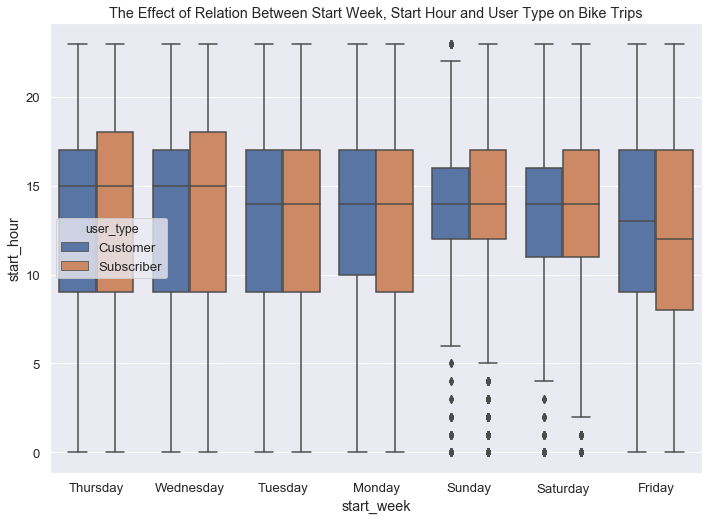

In [105]:
# Boxplot between start_week, start_hour and user_type to visualize their effect on Bike trips..
fig, ax = plt.subplots()
ax=sb.boxplot(x="start_week", y="start_hour", hue="user_type",data=df)
ax.set_title('The Effect of Relation Between Start Week, Start Hour and User Type on Bike Trips')
fig.set_size_inches(11.7, 8.27)
plt.show()

**- For all week days the range of start hour is between 9 to 18 but it very good figure that show there are week days that the spread of subscribers is very close to the customer.**

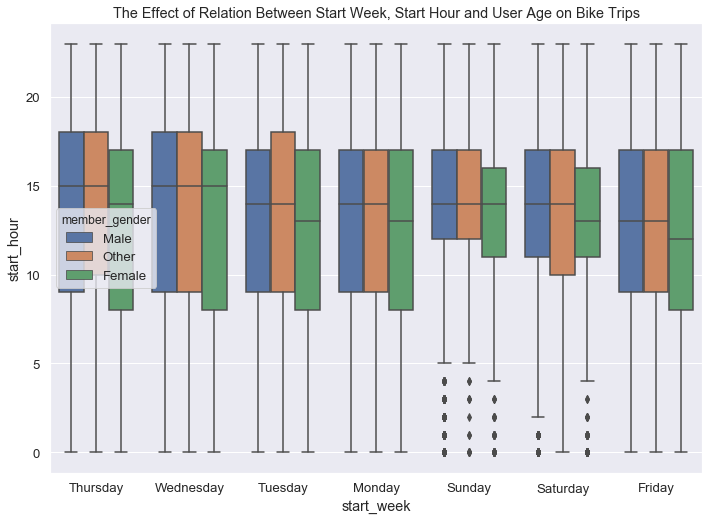

In [106]:
# Boxplot between start_week, start_hour and member_gender to visualize their effect on Bike trips..
fig, ax = plt.subplots()
ax=sb.boxplot(x="start_week", y="start_hour", hue="member_gender",data=df)
ax.set_title('The Effect of Relation Between Start Week, Start Hour and User Age on Bike Trips')
fig.set_size_inches(11.7, 8.27)
plt.show()

**- we see that this increase our profe that for femals their median start_hour are earlier than males in some weekdays.**

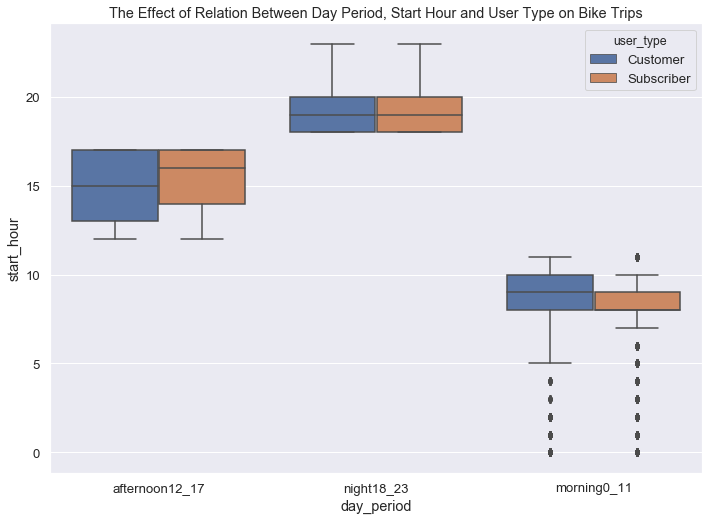

In [107]:
# Boxplot between day_period, start_hour and user_type to visualize their effect on Bike trips..
fig, ax = plt.subplots()
ax=sb.boxplot(x="day_period", y="start_hour", hue="user_type",data=df)
ax.set_title('The Effect of Relation Between Day Period, Start Hour and User Type on Bike Trips')
fig.set_size_inches(11.7, 8.27)
plt.show()

**- The spread of subscribers to customers is the same for nights but for morning there is a low spread for subcribers than customer and for afternoon also.**

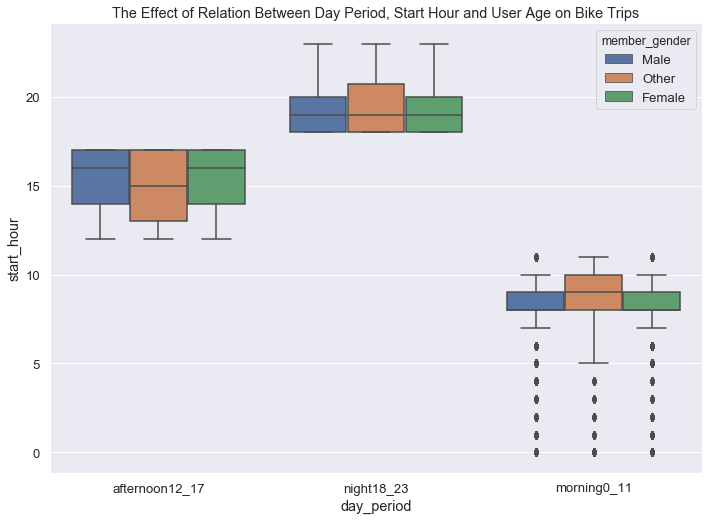

In [108]:
# Boxplot between day_period, start_hour and member_gender to visualize their effect on Bike trips..
fig, ax = plt.subplots()
ax=sb.boxplot(x="day_period", y="start_hour", hue="member_gender",data=df)
ax.set_title('The Effect of Relation Between Day Period, Start Hour and User Age on Bike Trips')
fig.set_size_inches(11.7, 8.27)
plt.show()

**- The start hour for all genders seems equal for its own periods.**

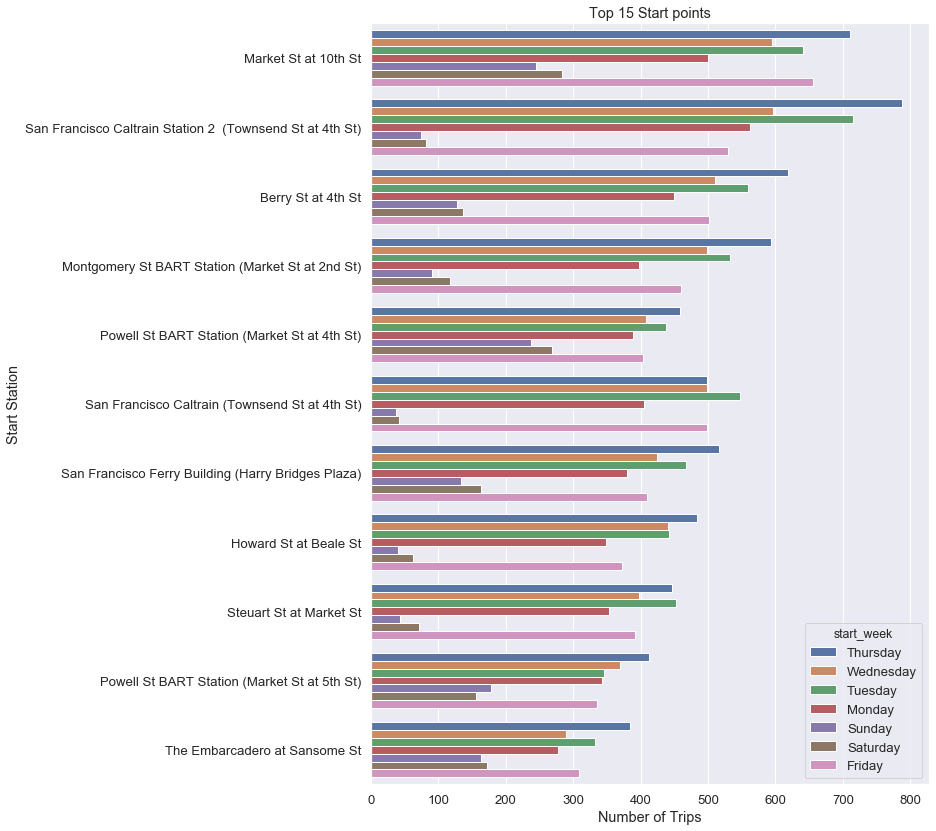

In [109]:
# Boxplot between start_station_name and start_week to visualize their effect on Bike trips..
fig, ax = plt.subplots()
ax= sb.countplot(y='start_station_name',data= df,hue='start_week', order=df.start_station_name.value_counts().index[:11])
ax.set(xlabel='Number of Trips', ylabel='Start Station', title= 'Top 15 Start points')
fig.set_size_inches(10, 14)
plt.show()

**- The Sunday and Saturday are the lowest number of trips for all start stations but the highest not always Thursday.**

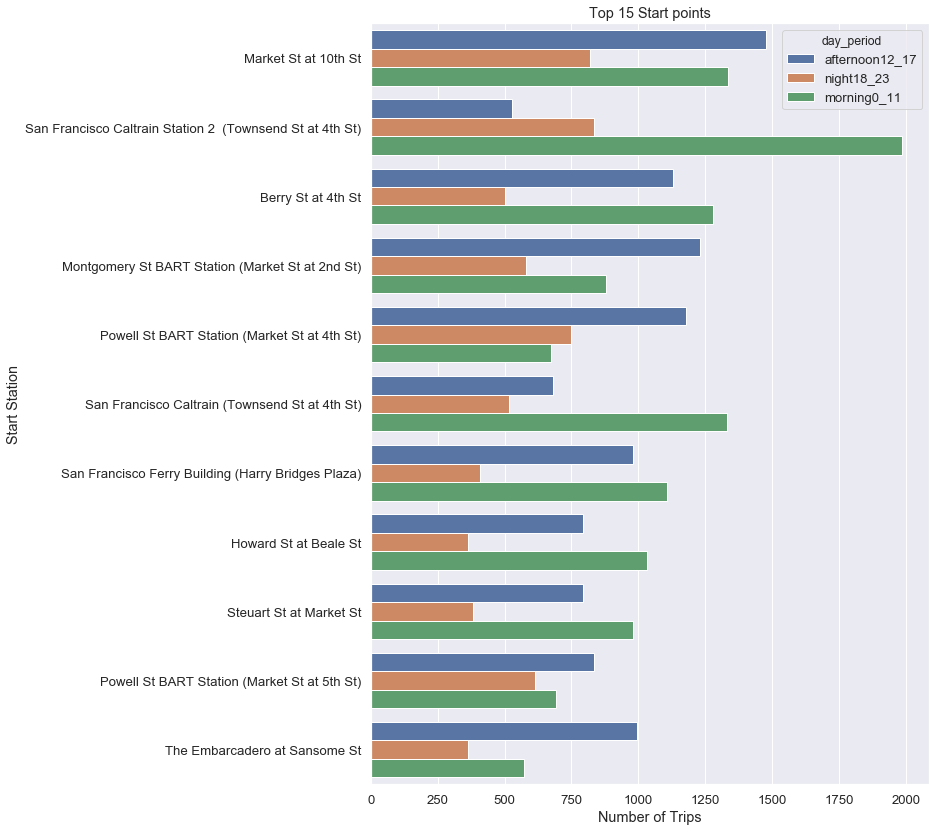

In [110]:
# Boxplot between start_station_name and day_period to visualize their effect on Bike trips..
fig, ax = plt.subplots()
ax= sb.countplot(y='start_station_name',data= df,hue='day_period', order=df.start_station_name.value_counts().index[:11])
ax.set(xlabel='Number of Trips', ylabel='Start Station', title= 'Top 15 Start points')
fig.set_size_inches(10, 14)
plt.show()

**- afternoon and morning periods are the highest for number of trips for all top start stations.**

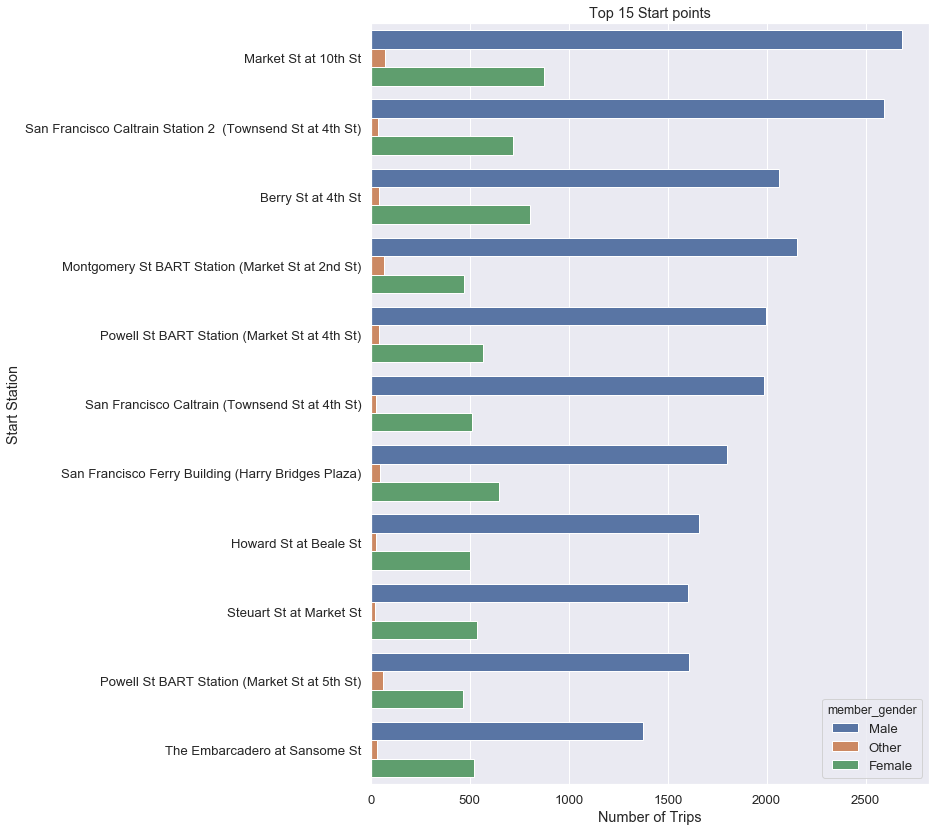

In [111]:
# Boxplot between start_station_name and member_gender to visualize their effect on Bike trips..
fig, ax = plt.subplots()
ax= sb.countplot(y='start_station_name',data= df,hue='member_gender', order=df.start_station_name.value_counts().index[:11])
ax.set(xlabel='Number of Trips', ylabel='Start Station', title= 'Top 15 Start points')
fig.set_size_inches(10, 14)
plt.show()

**- The males are the highest for number of trips for all top start stations.**

--------------------

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> **- For all week days the range of start hour is between 9 to 18 but it very good figure that show there are week days that the spread of subscribers is very close to the customer.**

> **- For femals their median start_hour are earlier than males in some weekdays.**

> **- The spread of subscribers to customers is the same for nights but for morning there is a low spread for subcribers than customer and for afternoon also.**

> **- The start hour for all genders seems equal for its own periods.**

> **- The Sunday and Saturday are the lowest number of trips for all start stations but the highest not always Thursday.**

> **- afternoon and morning periods are the highest for number of trips for all top start stations.**

> **- The males are the highest for number of trips for all top start stations.**

### Were there any interesting or surprising interactions between features?

> Yes, I get more relation between all features with the start stations and see their interactions as we saw above.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

---------------------------